In [1]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Cómo aplicar Python a la manipulación y análisis de datos crudos.

## Clase 5: Los do's and don'ts de la extraccion de datos

Hola, te doy la bienvenida a este modulo, en el cual aplicaremos los conceptos de entendimiento, obtencion, limpieza y organizacion de nuestros datos. Estos procesos como te comente anteriormente son de vital importancia ya que son fundamentales para realizar un excelente interpretacion y analisis de nuestros datos, asi que... manos a la obra

Primero, debemos entender nuestro dataset: Este es un registro de automoviles de la decada de los 80 (año 1985) en el cual se tiene:

- La especificación de un automóvil en términos de varias características fisicas y tecnicas
- Asignacion de riesgo de seguro, el cual dependiendo de su precio y caracteristicas se realiza una clasificacion de riesgo

Este dataset se obtuvo en la pagina que te dejo en la seccion de recursos (https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data), en el cual se puede obtener informacion mas detallada sobre la descripcion y sus autores 

Este dataset es perfecto para este proceso ya que con el se pueden aplicar tecnicas de obtencion, limpieza y organizacion. Ya veremos esto con mas detalle, a continuacion

Primero vamos a realizar el cargue de las librerias necesarias

    - pandas: Librería de Lectura y Manipulacion de datasets
    - numpy:  Librería de Python especializada en el cálculo numérico y el análisis de datos, especialmente para un gran volumen de datos.
    - matplotlib y seaborn: Visualizacion de datos y Graficas

Para importar estas librerias, como ya conocemos se realiza de la siguiente manera:

### Cargue de Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Extraccion y Lectura del Dataset

Ahora, antes de realizar la lectura de nuestro dataset, por temas de organizacion y como "hack" recomiendo realizar lo siguiente:

-   Crear una carpeta de nuestro proyecto
-   Dentro de dicha carpeta, crear tres subcarpetas: 
    -   Una para colocar los datasets
    -   Otra para colocar los notebooks
    -   Otra para colocar los resultados

Despues de realizado lo anterior, colocamos el dataset de nombre *imports-85.data* y el archivo *imports-85.names*. Ya mas adelante explicare que funcion tiene cada uno

Ahora, como segunda recomendacion, sugiero crear una variable donde vamos a colocar la ruta de nuestro dataset. En mi caso la ubicacion de mi dataset es la siguiente:

- "G:\Mi unidad\Crehana\Curso\datasets\imports-85.data" (Aca muestro como sacar esta ruta en VSCode)

Despues de copiada mi ruta, creo la variable que en nuestro caso se va a llamar "file_path" y el valor va a ser un string con la ruta de nuestro dataset. Como recomendacion y por temas de sistema operativo, se debe colocar la letra 'r' antes de texto de mi ruta, la cual debe estar entre comillas, como se muestra a continuacion:

In [3]:
file_path = '/content/gdrive/MyDrive/Crehana/Curso/datasets/imports-85.data'
#file_path = r'G:\Mi unidad\Crehana\Curso\datasets\imports-85.data'
#file_path = "../datasets/imports-85.data"

Procedemos a leer el archivo con la libreria pandas, usando el metodo *pd.read_table()* donde el primer argumento va a ser nuestra variable de ubicacion del dataset y comprobamos la lectura con el metodo *pd.head()*

In [4]:
df = pd.read_table(file_path)
df.head()

,"3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495"
0,"3,?,alfa-romero,gas,std,two,convertible,rwd,fr..."
1,"1,?,alfa-romero,gas,std,two,hatchback,rwd,fron..."
2,"2,164,audi,gas,std,four,sedan,fwd,front,99.80,..."
3,"2,164,audi,gas,std,four,sedan,4wd,front,99.40,..."
4,"2,?,audi,gas,std,two,sedan,fwd,front,99.80,177..."


Como vimos, se realizo la lectura del dataset pero su lectura no es comprensible, esto es debido a que es un archivo que tiene sus columnas separadas por comas, para corregir esto vamos a usar nuevamente el metodo *read_table()*, con el argumento inicial de nuestra variable de ubicacion del archivo y adicionamos *delimiter=","*, que en otras palabras, le estamos diciendo al metodo que nos lea el archivo que tiene por delimitador una "coma". Despues de lo anterior usamos el metodo (head)

In [5]:
df = pd.read_table(file_path, delimiter=",")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Genial!!!, ya realizamos la lectura del dataset y las columnas ya no estan agrupadas, sino que ya estan separadas debidamente gracias a la declaracion del delimitador. Pero hay algo que le falta a nuestro dataset, ¿Sabes identificar que es?. 

Exacto. No tenemos encabezados. Sin los encabezados no es posible identificar el significado de algunas de estas variables. Te propongo que en la siguiente clase encontremos juntos una solucion para tener estos nombres para que asi comprendamos el significado de las columnas, asi que... te espero alli

## Clase 6: Hacks para limpiar los datos:

Hola, te doy la bienvenida a esta clase, en la cual continuaremos nuestro proceso de limpieza y orden de nuestros datos.

Como evidenciamos en la clase anterior, tenemos un inconveniente (Que no es tan grave). El dataset que tenemos no cuenta con encabezados, lo cual hace que este no tenga sentido al momento de interpretar nuestros datos.

Como recomendacion, cada vez que nos suministren un dataset de datos estructurados, ya sea enviado en formato de hoja de calculo, archivo de texto o consultando a una base de datos, esta por lo menos debe tener el nombre de las columnas definidas. Si al momento de validar esto no contamos con esta informacion de la forma requerida podemos validar con negocio el significado de cada columna. 

Es importante que desde el principio tengas esta informacion estructurada ya que el analisis posterior va a ser mucho mas sencillo y no vas a quedar, como lo llamo yo, con "lagunas" en nuestros datos.

Ahora, retornando a nuestro ejemplo, para colocar los encabezados en nuestra carpeta de dataset se encuentra un fichero llamado *imports-85.names* el cual tiene los nombres de las columnas


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15UCDirLBXf3gGPDk22smpNFss0XcEgZ_"
         alt="Fashion MNIST sprite"  width="500">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Informacion de Atributos
  </td></tr>
</table>


De acuerdo con esto, creamos una lista con el nombre de las variables de nuestro datasets y ejecutamos nuevamente la carga de datos adicionando el argumento *names*, de la siguiente forma

In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Realizamos nuevamente la carga del dataset adicionando el argumento *names = headers*, y para comprobar la correcta lectura usamos el metodo head(10), para leer las 10 primeras filas

In [7]:
df = pd.read_table(file_path, delimiter=",", names = headers) 
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Perfecto, nuestro dataset ya esta con los encabezados correspondientes. Esto ya nos da mucha mas informacion sobre su estructura. Te recuerdo que si quieres contar con mas informacion sobre definicion de las variables puedes acudir a este archivo *imports-85.names* para explorar mas estas variables

Ahora, si te fijas bien nuestro dataset cuenta con algunos signos de interrogacion. Esto significa no se tiene informacion y son datos faltantes. 

Debemos realizar un proceso de limpiado para que nuestro analisis no tenga inconvenientes a futuro

Ahora nos surge un nuevo interrogante: ¿Como identificamos y manejamos todos aquellos valores que faltan?

Para ello, dentro de nuestra limpieza de estos datos debemos seguir los siguientes pasos:

<ol>
    <li>Identificar los datos faltantes</li>
    <li>Manejar los datos faltantes</li>
    <li>Corregir el formato de los datos</li>
  </ol>

En otras palabras, Debemos realizar la conversion de los valores "?" a un valor que Python detecte como un "dato faltante". Este valor se llama NaN (Not a Number)
¿Como hacemos esta conversion?. con el metodo *pd.replace()*, donde nuestro primer argumento es el valor origen (?), el segundo es el valor que necesitamos (np.nan) y finalmente colocamos inplace = True, que lo que va a hacer es reemplazar el dataset con el nuevo, aplicando esos cambios.

In [8]:
df.replace("?", np.nan, inplace = True) # Reemplazamos los valores "?" por "NaN" values
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como vimos en nuestro dataset, los registros con campos faltantes ya no tienen los valores "?" y ahora fueron reemplazados por el valor NaN, el cual Python detecta como un dato faltante.

Ahora necesitamos identificar que campos tienen valores nulos, o NaN values. Esto lo podemos hacer de dos formas:

 - Forma grafica (Dibujando un heatmap o mapa de calor de las variables que tienen estos valores)
 - Creando un ciclo for que valide cada columna si tiene valores nulos con el metodo pd.isnull() y nos diga su cantidad

Ambos metodos desde mi punto de vista son muy validos, los miramos a continuacion:

Primero realizamos el metodo grafico, con la libreria seaborn: En este grafico vemos en el eje x las diferentes variables de nuestro dataset, en el eje y aunque no se ve, representa los indices del dataset. Dentro del trafico se muestran unas lineas horizontales, donde solo se dibuja en la relacion variable vs indice donde encuentre un valor nulo

Este grafico nos puede dar una visual de que en variables como "normalized-loses", "num-of-doors", "bore", "stroke", etc. se encuentran valores nulos

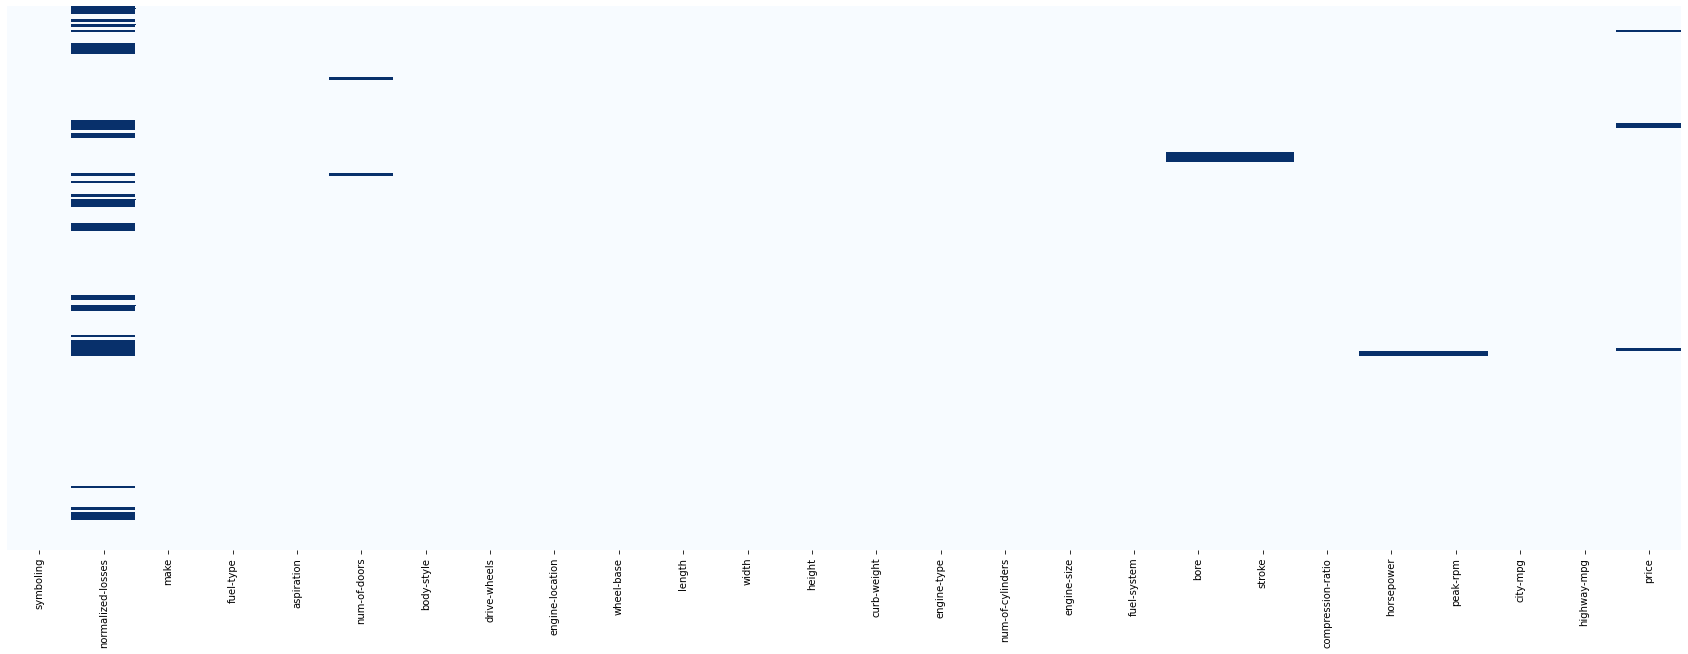

In [9]:
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")
sns.set(font_scale=1)
plt.show()
plt.close()

La segunda opcion es validar esta cantidad mediante el metodo *df.isnull()*: Esto lo que nos permite validar es que si cada valor que esta en nuestra columna es un valor nulo o no es nulo. retorna True si es Nulo y False si no lo es

In [10]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Ahora, lo que vamos a hacer es del metodo anterior vamos a adicionarle el metodo sum(), que nos sumara la cantindad de valores nulos que son True

In [11]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Con base en ambos analisis anteriores, cada columna tiene 205 filas de datos, donde siete columnas contienen información faltante:

<ol>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"num-of-doors": 2 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"stroke" : 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
    <li>"price": 4 datos faltantes</li>
</ol>

Perfecto, ya realizamos la limpieza incial de nuestro dataset en cuanto a forma y estructura. Ya tenemos los encabezados y detectamos en que variable hay datos sin informacion al validar dos formas practicas y utilles. Ahora, ¿Que hacemos para manejar estos valores faltantes? En nuestra proxima clase te explicare como hacerlo. Te espero alli

## Clase 7: Manejo de Valores Faltantes y formato de variables

Hola, te doy la bienvenida a esta clase. Si recuerdas en la clase anterior identificamos las columnas que cuentan con valores nulos mediante dos tecnicas que, como te comente, me sirven mucho para identificar este tipo de datos: Dibujando un mapa de calor, o creando un ciclo for

Ahora, en esta clase te mostrare como manipular estos valores faltantes

Las dos formas que mas se usan son eliminando datos o reemplazando datos:

<ol>
    <li>Si Eliminamos datos:<br>
        a. eliminar toda la fila<br>
        b. eliminar toda la columna
    </li>
    <li>Si Remplazamos datos<br>
        a. remplazar por la media<br>
        b. remplazar por la frecuencia<br>
        c. remplazar en base a otras funciones o analisis
    </li>
</ol>

Todas las columnas deberían ser eliminadas solo si la mayoría de las entradas de la columna estan vacias. En nuestro conjunto de datos ninguna de las columnas estan tan vacias como para eliminarlas completamente. Y gracias a ello, como Analistas de datos tenemos cierta libertad de elegir cual método usar para reemplazar los datos; sin embargo, algunos métodos pueden ser mejores que otros, esto va dependiendo de lo que digan tus datos y los analisis particulares que realices para cada columna.

Te mostrare algunos ejemplos, asi que vamos a la computadora

**Remplazar con la Media**

En mi caso aplicare esta tecnica para las siguientes columnas

<ul>
    <li>"normalized-losses": 41 datos faltantes , remplazar con la media</li>
    <li>"stroke": 4 datos faltantes , remplazar con la media</li>
    <li>"bore": 4 datos faltantes , remplazar con la media</li>
    <li>"horsepower": 2 datos faltantes , remplazar con la media</li>
    <li>"peak-rpm": 2 datos faltantes , remplazar con la media</li>
</ul>

</ul>

Y te preguntaras ¿Por que se aplicara este metodo? Al momento de analizar esta (o estas columnas) mediante un grafico de histograma donde se visualiza la probabilidad de cada valor, se ve que todos los datos esta repartidos entre unos valores minimos y maximos y estos tienden a estar acumulados en alguna lugar del grafico. Para evitar ser estrictos con este valor, es recomendable usar la media en estos casos, como vemos a continuacion

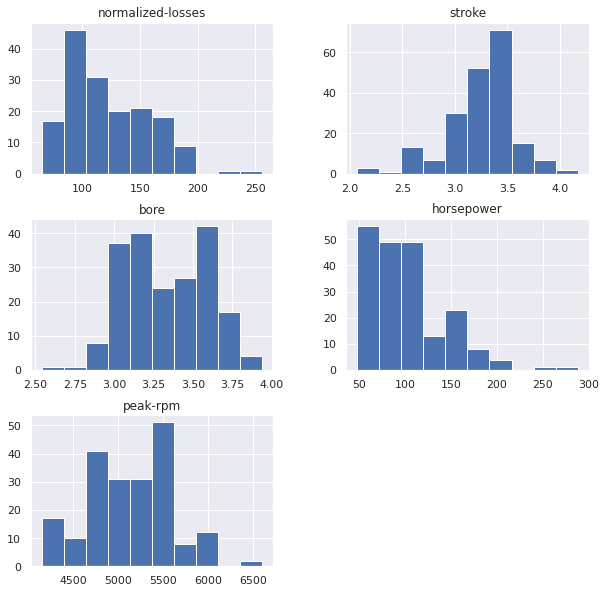

In [12]:
df[["normalized-losses","stroke","bore","horsepower","peak-rpm"]].astype('float').hist(figsize=(10,10), color = 'b')
plt.show()
plt.close()

De acuerdo a lo anterior, vamos a usar el metodo *pd.replace()* donde, como hicimos con los valores "?", reemplazamos para estas cinco columnas los valores nulos con el valor de su media. 

Si te fijas, tomo el valor de la media mediante la instruccion *df["columna"].astype("float").mean()* Recuerda que el inplace = True me reemplaza estas columnas con los valores de la media

In [13]:
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean(), inplace=True)
df["stroke"].replace(np.nan, df["stroke"].astype("float").mean(), inplace=True)
df["bore"].replace(np.nan, df["bore"].astype("float").mean(), inplace=True)
df["horsepower"].replace(np.nan, df["horsepower"].astype("float").mean(), inplace=True)
df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype("float").mean(), inplace=True)

Remplazar con la Frecuencia:

Con la frecuencia la aplicaremos a la columna "num-of-doors", Debido que tener cuatro puertas es mas frecuente, es mas probable que ocurra. Para ello, lo podemos ver en el siguiente grafico el cual nos muestra que "four" tiene mas probabilidad que "two"

In [14]:
plt.figure(figsize=[10,5])
sns.histplot(df["num-of-doors"],stat="probability")
sns.set(font_scale=1.5)
plt.close()

Aplicamos el mismo proceso, pero esta vez en vez de usar la media, reemplazamos con la palabra "four"

In [15]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Eliminar toda la fila:

Para este caso se van a eliminar las filas donde haya valores nan. El motivo es que el precio es lo que queremos predecir. Cualquier dato de entrada sin precio no puede ser usado para predecir; debido a esto toda fila sin información del precio no es de utilidad

In [16]:
# elimina toda la fila con NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

Luego de estos ajustes realizamos nuevamente la validacion grafica de valores nulos con nuestro heatmatp. Por fortuna, ya no tenemos valores nulos

In [17]:
df.reset_index(drop = True, inplace=True) # reiniciamos indices

plt.figure(figsize=[20,10])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")
sns.set(font_scale=1)
plt.close()

Perfecto, ya no tenemos valores nulos como visualizamos en el grafico. Te invito a que hagas el proceso del ciclo for visto anteriormente para comprobar lo que muestra el grafico

Ahora, como paso final de la limpieza de datos debemos revisar y asegurar que cada columna tenga el formato de texto adecuado (int, float, text, fecha, etc). Para tal fin, podemos realizar esta conversion con los metodos de pandas *pd.dtype()* para revisar cual tiene, y *pd.astype()* para cambiar el tipo de dato

In [18]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver arriba, algunas columnas no tienen el tipo correcto de dato. Las variables numericas deben ser de tipo 'float' o 'int', y las variables con cadenas como pueden ser las categorias deben ser de tipo 'object'. Por ejemplo, las variables 'bore' y 'stroke' son valores numericos que describen los motores, asi que podemos esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'objetc'. Debemos convertir los tipos de datos al formato apropiado para cada columna utilizando el método "astype()".
</p> 


In [19]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [20]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

¡Perfecto!, Ahora ya tenemos nuestro dataset limpio, sin valores faltantes y con el formato correspondiente a cada columna. Te felicito por llegar a este punto y por haber aprendido tecnicas de tratamiento de datos. 

En la proxima clase iniciaremos el proyecto, en el cual aplicaras todas estas tecnicas vistas. Asi que... adelante...

## Clase 8: Proyecto parte 1: Extraccion y limpieza de datos

Hola, te felicito por llegar a este punto. Aunque no lo veas, haz aprendido tecnicas que aunque parecen sencillas, son muy importantes en el analisis de datos. Saber leer nuestros datos, interpretar las variables y manipular la informacion inconsistente son procesos iniciales necesarios que contribuyen a un buen analisis de datos. 

Ahora llego el turno de medir tus conocimientos. Aplicaras todas las tecnicas que viste en el modulo para un dataset de medicion de millas por galon para una serie de automoviles. Tendras que interpretar las variables, leer los datos, validar si tiene o no encabezados y valores nulos. Todo lo que debes realizar se encuentra en los materiales adjuntos de la clase

De igual forma te dejare el notebook que construimos para que tengas una guia de como desarrollar esta primera parte de nuestro proyecto.

Asi que... manos a la obra y mucha suerte


**Nota: Debo: Hacer los puntos de la actividad, validar ruta de adjuntos**


# Analisis Exploratorio de Datos y Estadisticos basicos

## Clase 10: Estandarizacion, Normalizacion y Agrupacion de los datos

Hola, te doy la bienvenida a esta clase. En la anterior sesion conocimos que es el Analisis Exploratorio de Datos. Tambien vimos sus etapas, lo que se hace alli y la importancia que se debe tener al momento de entrados en el analisis

Ahora, dentro de la etapa del ajuste de datos y variables se realizan unos procesos los cuales nos permiten obtener aun mas informacion de nuestros datos, e incluso, pueden ser utiles al momento de crear y entrenar un modelado de datos. Estos procesos son la estandarizacion, la normalizacion, la discretizacion y la creacion de variables dummy. Profundizaremos mas en cada etapa, a continuacion:

**Estandarizacion**

Los datos en algunos casos se recolectan de distintas fuentes, con formatos y mediciones diferentes, lo cual para algunas regiones (por ejemplo) estos formatos son desconocidos o no son entendibles

La estandarizacion es el proceso que nos permite la transformacion de nuestros datos en un formato comun que nos ayude como investigadores a comprenderlos de una mejor forma

Por ejemplo, en nuestro conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" estan representadas por m.p.g. (millas por galón). Deberás asumir que estamos desarrollando una aplicación en un país que acepte el estandar de consumo en L/100km.

En nuestro caso, debemos realizar esta conversion y para tal fin solo basta con realizar la conversion de mpg a L/100km, que es nuestro estandar

<p>La formula de conversión es<p>
L/100km = 235 / m.p.g.
<p>Con pandas podemos realizar muchas operaciones matematicas directamente en Pandas.</p


In [21]:
# Convertir las columnas m.p.g. a L/100km mediante una operación matematica (235 dividido por m.p.g.)
df['city-L/100km'] = 235/df["city-mpg"] # Creamos una columna en nuestro dataset
df["highway-L/100km"] = 235/df["highway-mpg"] # Creamos una columna en nuestro dataset

# revisar los datos transformados
df[["city-mpg","city-L/100km","highway-mpg","highway-L/100km"]].head()

,city-mpg,city-L/100km,highway-mpg,highway-L/100km
0,21,11.190476,27,8.703704
1,21,11.190476,27,8.703704
2,19,12.368421,26,9.038462
3,24,9.791667,30,7.833333
4,18,13.055556,22,10.681818


**Normalizacion**

De forma mas simple, la normalizacion es un proceso que nos permite ajustar los valores tomados y medidos en diferentes escalas a una comun. Se realiza la transformacion de algunas variables que esten muy grandes a un rango similar. Por lo general, en terminos estadisticos, una normalizacion tipica incluye el redimensionado de las variables para que el promedio sea 0 y la varianza 1, o que los valores del rango sea entre 0 y 1

<h2 id="data_normalization">Normalización de los Datos</h2>

<b>¿Por que debemos normalizar los datos?</b>

<p>La normalización es el proceso de transformar los valores de algunas variables dentro de un rango similar. La normalización típica incluye el redimensionado de las variables para que el promedio sea 0 y la varianza 1, o para que los valores del rango sean entre 0 y 1.
</p>

Por ejemplo, queremos redimensionar las columnas "length", "width" y "height", nuestro objetivo es hacer el proceso de normalizacion para los valores de cada columna esten entre 0 y 0

<b>Ejemplo</b>

Para hacer una demostración, digamos que queremos redimensionar las columnas "length", "width" y "height"
Nuestro Objetivo es Normalizar las variables para que los rangos de sus valores se encuentren entre 0 y 1.

Una aproximacion de este proceso seria: remplazar el valor original por (valor original)/(valor máximo) de la columna, asi que realizamos lo siguiente

Nota: Hay varias formas de realizar este proceso, pero la que vamos aplicar es basica y una de las mas comunes


In [22]:
# Tomamos las columnas que queremos normalizar
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [23]:
# intercambia (valor original) por (valor original)/(valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['width']/df['width'].max()
# Visualizamos nuevamente las columnas, que ya estan normalizadas
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.890278
1,0.811148,0.890278,0.890278
2,0.822681,0.909722,0.909722
3,0.848630,0.919444,0.919444
4,0.848630,0.922222,0.922222


Podemos ver que hemos normalizado "length", "width" y "height" en el rango [0,1].


## Discretización de los Datos

La discretizacion de los datos es el proceso por el cual transformamos los datos numericos en algo llamado "contenedores" discretos, o en otras palabras, agrupamos los datos en categorias

En nuestro conjunto de datos, "horsepower" es una variable con valor en el rango de 48 a 288, tiene 57 valores únicos. ¿Qué pasaría si solo nos ocuparamos de las diferencias de precio entre automoviles con altos, medios y pocos caballos de fuerza (3 tipos)? 

¿Podriamos reacomodarlos dentro de tres 'contenedores' para facilitar el análisis?

Para ello, usaremos el método de Pandas 'cut' para segmentar la columna 'horsepower' en 3 contenedores.

In [24]:
df["horsepower"]=df["horsepower"].astype(int, copy=True) # Corregimos el tipo de dato a entero (con el metodo astype que ya vimos)

Grafiquemos el histograma de los caballos de fuerza para ver la apariencia de su distribución.

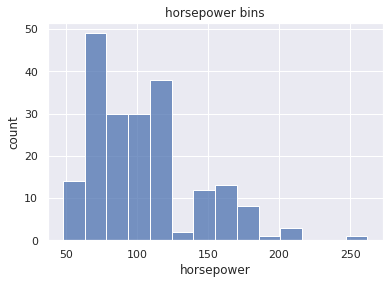

In [25]:
# establece las etiquetas x/y y muestra el título 
sns.histplot(data=df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

Como vemos en la distribucion, se puede realizar un agrupamiento mediante contenedores (o bins), para ello, la libreria numpy tiene una funcion llamada *linspace* que tomara el valor minimo, maximo y el numero de contenedores sumadole 1 

Construimos un arreglo tipo contenedor, desde un valor mínimo al máximo y un ancho de bando calculado arriba. Los contenedores seran valores usados para determinar cuando uno de ellos termina y otro comienza.

In [26]:
bins = np.linspace(min(df["horsepower"]), # Valor minimo de la columna
                   max(df["horsepower"]), # Valor maximo
                   4 # Como se necesitan 3 contenedores, deben haber 4 divisiones
                   )
bins # Mostramos los contenedores (lo muestra como un metodo array)

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Como vimos, Python encontro 4 divisiones de datos

Ahora, Establecemos los nombres de grupo, donde: 

- Low: Valores entre 48.0 y Menor o igual a 119.33
- Medium: Valores entre 119.33 y Menor o igual a 190.66
- High: Valores entre 190.66 y Menor o igual a 262.0

In [27]:
group_names = ['Bajo', 'Medio', 'Alto'] # Etiquetas de rangos

Aplicamos la función "cut" para determinar a quien pertenece cada valor de "df['horsepower']".

In [28]:
df['horsepower-binned'] = pd.cut(df['horsepower'],  # Tomamos la columna
                                 bins, # Con estos contenedores encontrados
                                 labels=group_names, # Le aplicamos esta etiqueta de acuerdo al contendedor
                                 include_lowest=True ) # Si el primer intervalo lo debemos incluir, en este caso le damos true

df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


Veamos el número de vehiculos en cada contenedor.

In [29]:
df["horsepower-binned"].value_counts()

Bajo     153
Medio     43
Alto       5
Name: horsepower-binned, dtype: int64

Dibujemos la distribución de cada contenedor.

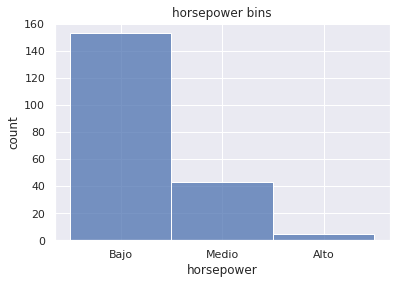

In [30]:
sns.histplot(data=df["horsepower-binned"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

Hemos reducido exitosamente el número de intervalos de 57 a 3.  


<h3>Visualización de Contenedores</h3>
Otra opcion que se puede visualizar es de la siguiente forma

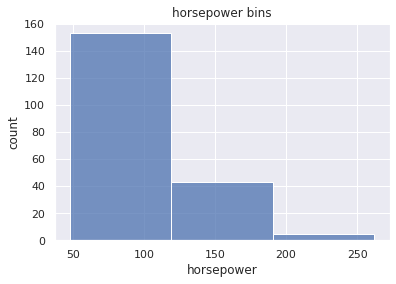

In [31]:
sns.histplot(data=df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

<h2 id="indicator">Variable Indicadora (o variable tonta) - Dummy Variable</h2>

Finalmente, hay un proceso o tecnica que se llama dummy variable, o "variable tonta". Es una variable numerica usada para etiquetar categorías. Son llamadas "tonta" porque los números en ellas no tienen ningun significado.

¿Para que se usa una variable indicadora?

Normalmente estas variables dummy son usadas para analisis de regresion, que veremos mas adelante en el curso

Ejemplo: Vemos que la columna "fuel-type" tiene dos valores únicos, "gas" o "diesel". La regresión no entiende palabras, solo números. Para usar este atributo en el análisis de regresión debemos convertir "fuel-type" en una variable indicadora.

Usaremos el método Pandas 'get_dummies' para asignarle un valores numericos a difentes categorias de tipo de combustible.

In [32]:
df["fuel-type"].value_counts() # Contamos dentro de la variable "fuel-type" cuantos tienen gas o diesel

gas       181
diesel     20
Name: fuel-type, dtype: int64

Ahora, para convertir esas variables en variables dummy, vamos a crear un dataframe, con el metodo *get_dummies* 

In [33]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'diesel':'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace=True) # Es buena idea realizar este renombramiento de variables
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Ahora tenemos el valor 0 para representar "gas" y 1 para "diesel" en la columna "fuel-type". Insertaremos esta columna en el nuestro dataset original.

In [34]:
# combinar el dataframe "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
# eliminar la columna original "fuel-type" de "df" 
df.drop("fuel-type", axis = 1, inplace=True)

In [35]:
df.head() # Ver el final del dataset

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Bajo,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Bajo,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.909722,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medio,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.919444,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Bajo,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.922222,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Bajo,0,1


Ahora realizamos el mismo proceso para la variable "aspiration"

In [36]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Bajo,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Bajo,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.909722,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medio,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.919444,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Bajo,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.922222,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Bajo,0,1,1,0


Felicidades, ahora ya tienes mas herramientas para realizar el tratamiento de datos y variables que te ayudan a complementar tu analisis general

Ahora, es el momento de aplicar un analisis general de nuestro dataset, y esto lo realizamos mediante la obtencion de metricas estadisticas, asi que nos vemos en la siguiente clase


## Clase 11: Descripcion estadisticas del dataset

Hola, te doy la bienvenida a la clase, en la cual vamos a aplicar metricas estadisticas basicas de nuetro set de datos, a si que, acompañame

Para poder realizar una vista a nuestras variables usando un metodo de descripcion estadistica, pandas tiene un metodo llamado *describe*, revisemos de que se trata

In [37]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.915126,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.029187,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.837500,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.890278,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.909722,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.925000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


<p>La función <b>describe</b> automáticamente calcula estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.</p>

Esto mostrará:

<ul>
    <li>el recuento de esa variable</li>
    <li>la media</li>
    <li>la desviación estándar (std)</li> 
    <li>el valor mínimo</li>
    <li>el IQR (rango intercuartil: 25%, 50% y 75%)</li>
    <li>el valor máximo</li>
<ul>

Una forma mas grafica de entender estas metricas el realizando un grafico llamado "boxplot", en cual ayuda a comprender mucho mas facil los valores estadisticos de nuestras variables

Para ello, vamos a aplicar el metodo describe para la columna "normalized-losses"

In [38]:
df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Vemos que nos muestra estas metricas detalladas, ahora vamos a hacer lo mismo de forma grafica

Vemos lo siguiente en el boxplot: 

- Los puntos que estan en el grafico son nuestras 201 muestras que estan en la columna
- Su media que esta en 13207
- Su valor minimo o bigote inferior, que esta en 5118
- Su Q25 que esta en 7775
- Su Q50 que esta en 10295 
- Su Q75 que esta en 16500
- Su bigote superior que esta en 27000
- Su valor maximo que esta en 45400

Tambien vemos que muestra unos puntos que estan sobre el bigote superior, esos puntos son los outliers o valores atipicos que se encuentran en nuestro dataset esto quiere decir que estos puntos estan muy distantes en comparacion con el grupo total de datos de la variable

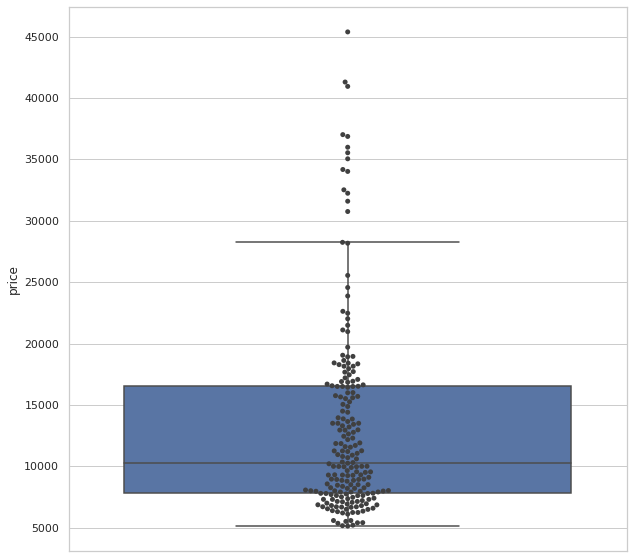

In [39]:
plt.figure(figsize=[10,10])
sns.set(style="whitegrid")
ax = sns.boxplot(y="price", data=df, showfliers = False)
ax = sns.swarmplot(y="price", data=df, color=".25")
plt.show()
plt.close()

Tambien se puede aplicar el metodo describe para las variables que son de tipo *object* o que contengan texto

In [40]:
# Describe para variables que no son numeros
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


Ahora que vimos las ventajas que tiene la exploracion estadistica y la informacion que muestra la visualizacion mediante boxplot, vamos a analizar las relaciones que hay entre variables, y para ello, como primer paso, vamos a comprender que son las variables categoricas

<h3>Variables categóricas</h3>

<p>Estas son variables que describen una ‘característica’ de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo “objeto” o “int64”. 

Un ejemplo de categoria en nuestro dataset es el "body style" de los carros, donde se clasifican entre convertible, hatchback, sedan, wagon y hardtop

Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.</p>

Ahora que ya comprendemos este concepto importante, vamos a ver la relación entre “body-style”, como variable categorica y “price”.

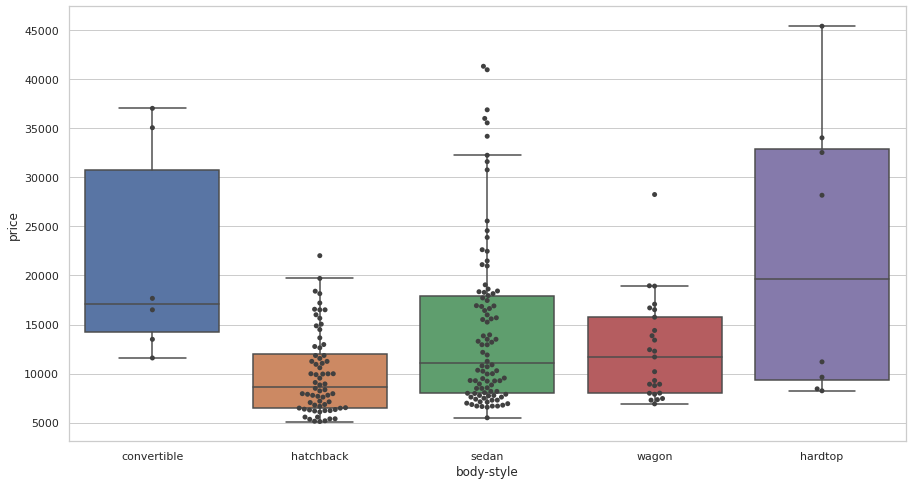

In [41]:
plt.figure(figsize=[15,8])
sns.set(style="whitegrid")

ax = sns.boxplot(x="body-style", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="body-style", y="price", data=df, color=".25")
plt.show()
plt.close()

Vemos que las distribuciones de precios entre las diferentes categorías de estilo de cuerpo tienen una superposición significativa, por lo que el estilo de cuerpo no sería un buen predictor del precio. 

Examinemos la ubicación del motor “engine-location” y el “precio” del motor:

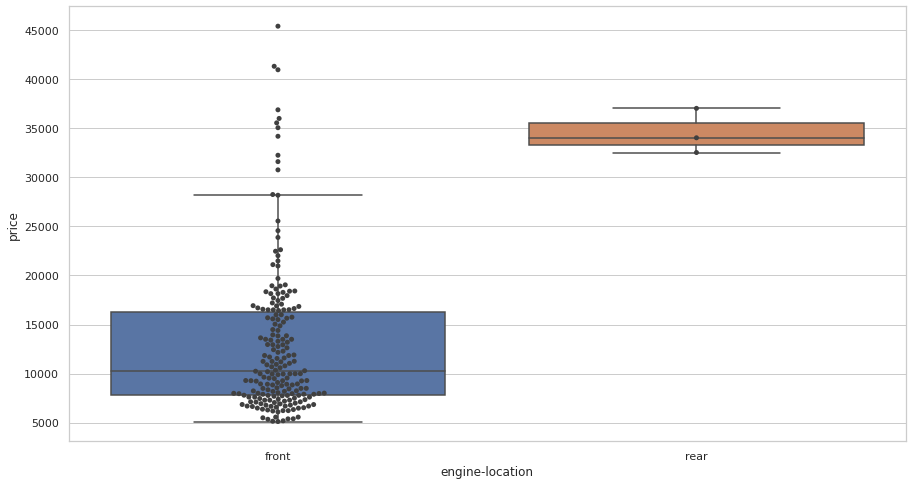

In [42]:
plt.figure(figsize=[15,8])
sns.set(style="whitegrid")
ax = sns.boxplot(x="engine-location", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="engine-location", y="price", data=df, color=".25")
plt.show()
plt.close()

Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, es lo suficientemente distinta como para tomar la ubicación del motor como un buen predictor potencial del precio.

Examinemos “drive-wheels” y “price”.

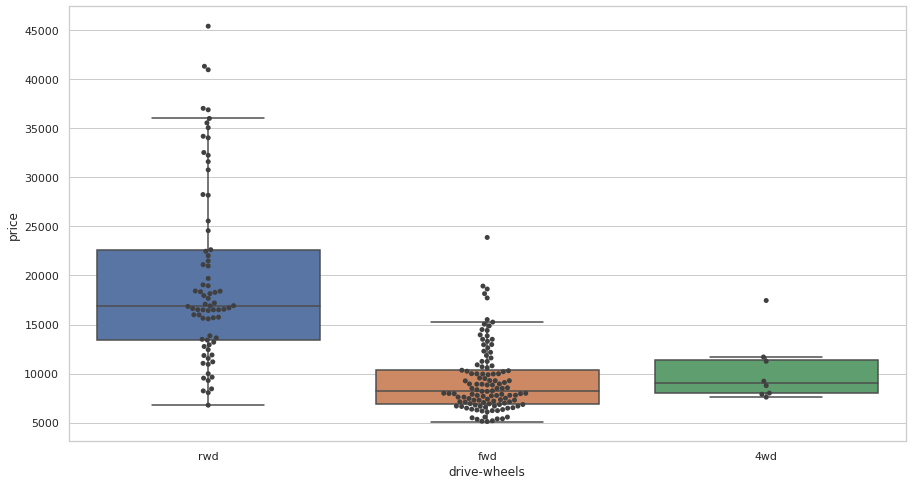

In [43]:
# drive-wheels

plt.figure(figsize=[15,8])
sns.set(style="whitegrid")
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")
plt.show()
plt.close()

Aquí vemos que la distribución de precios entre las diferentes categorías de drive-wheels es diferente; como tales, drive-wheels podría ser un predictor de precio.

Excelente, ya aprendiste a realizar una analisis estadistico basico de nuestras variables, ayudandonos con los graficos de boxplots. Si te fijaste, con estos graficos se pueden visualizar metricas estadisticas, y si tienen o no alguna relacion con nuestra variable objetivo, que en este caso es el precio

En nuesta proxima clase, te explicare un concepto que tambien es muy util para validar estas relaciones entre variables, sobre todo las numericas, y es el concepto de correlacion. Asi que, nos vemos en la siguiente clase

## Clase 12: Relacion Lineal y Correlacion de datos

Hola, te doy la bienvenida a esta clase en la cual vamos a aplicar un concepto muy usado en el analisis exploratorio de datos, y es la correlacion de datos. 

Antes de entrar en materia, dejame explicarte otro tipo de variables que se ven en los conjuntos de datos. Ya vimos el concepto de variable categorica, que como su nombre lo indica, son las que categorizan una variable, ahora vamos a comprender las variables numericas continuas

Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de cierto rango. Las variables numéricas continuas pueden tener el tipo “int64” o “float64”. Estas variables continuas son ideales para entender el concepto de relacion lineal o correlacion de variables.

Ahora, ¿Que es la correlacion?

El coeficiente de correlación lineal es una medida de regresión que nos sirve para establecer la relación lineal entre dos variables. De esta manera, su cálculo permite conocer con exactitud el grado de dispersión de los valores de una variable en relación con otra variable.

Ahora como te comentaba la correlación examina la relación entre dos variables. Sin embargo, observar que dos variables se mueven conjuntamente no significa necesariamente que una variable sea la causa de la otra. Por eso solemos decir que "la correlación no implica causalidad". 

Por ejemplo, la lluvia está correlacionada con el uso de paraguas, y los paraguas están igualmente correlacionados con la lluvia. Pero cuando usamos los paraguas no quiere decir que por ello se cause la lluvia, y cuando no lo usamos no quiere decir que vaya a dejar de llover

Para comenzar a comprender los conceptos de la relación (lineal) y correlacion vamos a realizar una revision para tres variables dentro de nuestro set de datos y el precio. Podemos hacer esto usando “regplot”, que traza el diagrama de dispersión más la línea de regresión ajustada para los datos y aplicar el metodo *corr()* para evaluar ese coeficiente de correlacion



Como primer punto de partida, vamos a generar el dataset y grafico de correlaciones para nuestro set de datos, de la siguiente manera

In [44]:
correlations = df.corr() # Creamos una dataset con el metodo pd.corr() el cual mostrara las correlaciones entre variables
correlations

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.242423,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,0.086802,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.814507,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.857170,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.866201,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.729436,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.544885,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,0.188822,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


Ahora vamos a graficar este mismo dataset, el resultado es similar ya que en el grafico para cada relacion entre variables va a generar una escala de colores, donde mas claro es una correlacion positiva, y mas oscuro es negativa

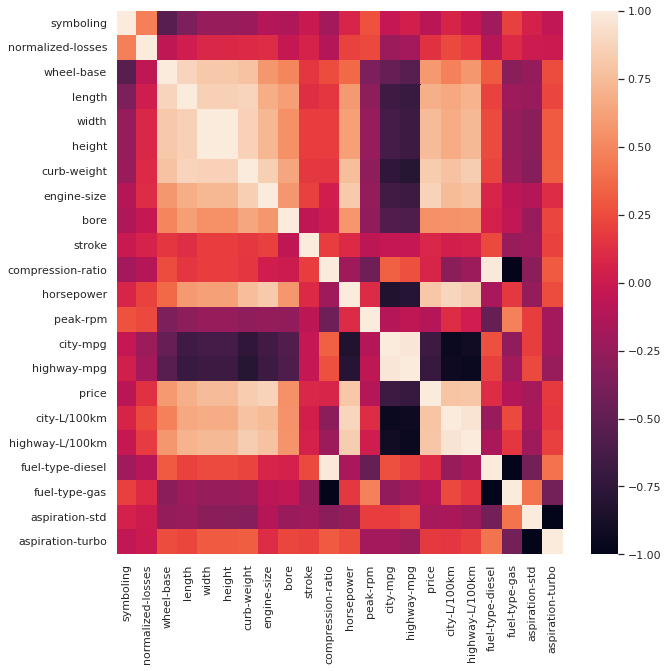

In [45]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=False)
sns.set(font_scale=1)
plt.show()
plt.close()

Este valor de coeficiente es llamado Correlación de Pearson (hay varios mas, pero este es el que viene por defecto con el metodo)

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

- 1: correlación lineal positiva total. 
- 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí. 
- -1: correlación lineal negativa total.

Estos valores son fundamentales a la hora de escoger las variables candidatas a ser optimos predictores si requerimos construir un modelo predicitivo o de clasificacion

Como te comentaba, La Correlación de Pearson es el método predeterminado de la función “corr“. Tener en cuenta que solo podemos calcular la correlación de Pearson de las variables ‘int64’ o ‘float64’.

Como ejemplo vamos a visualizar los diferentes tipos de correlacion

Busquemos el diagrama de dispersión de “tamaño del motor” y “precio”

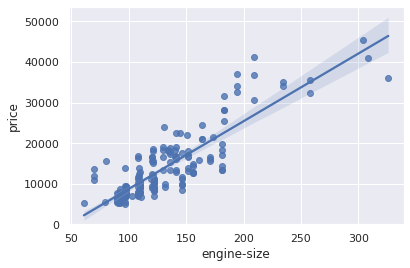

In [46]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()
plt.close()

A medida que aumenta el tamaño del motor, aumenta el precio. Esto indica una relacion lineal positiva ua ya que la pendiente o la tendencia es positiva (mayor tamaño de motor -> Mayor precio)

Ahora construyamos un grafico donde explique de forma numerica y resumida lo anterior

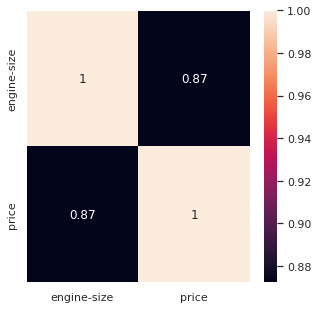

In [47]:
correlation = df[["engine-size", "price"]].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

Podemos examinar la correlación entre ‘tamaño del motor’ y ‘precio’ y ver que es aproximadamente 0.87, un valor considerablemente alto

Veamos otro ejemplo de correlacion, entre millas por galon vs precio

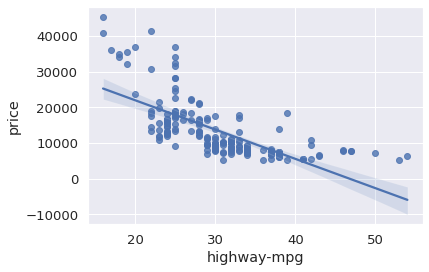

In [48]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()
plt.close()

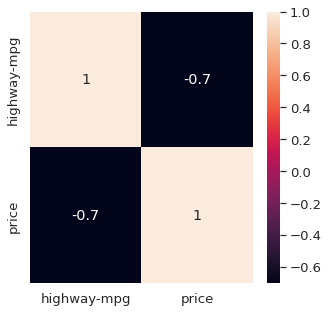

In [49]:
correlation = df[['highway-mpg', 'price']].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

A medida que aumenta las millas por galon, disminuye su precio. Esto indica una relacion lineal negativa ya que la pendiente o la tendencia es negativa 

En cuanto al grafico de correlacion, este da un valor de -0.7, una correlacion negativa

Veamos un ultimo ejemplo, entre "rpm" y "price"

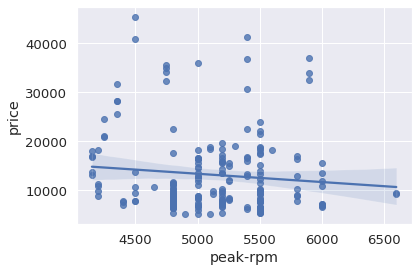

In [50]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()
plt.close()

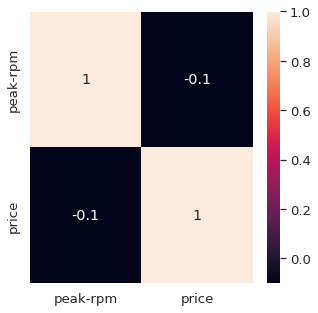

In [51]:
correlation = df[['peak-rpm','price']].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

La grafica de esto es casi horizontal y su pendiente tiende a ser con un valor cercano a 0

En cuanto a la correlacion entre "peak-rpm" y "price", vemos que no existe correlacion ya que el valor es cercano a 0. 

Felicidades, aprendiste de forma practica e introductoria el concepto de correlacion. Si te fijas, esta metolodologia nos ayuda a evaluar que variables son importantes a la hora de predecir nuestro precio. Las variables que cuentan con una relacion positiva son buenos predictores a la hora de construir nuestro modelo

En nuestra proxima clase vamos a aplicar todos estos conceptos en nuestro proyecto. Te espero alli

## Clase 13: Proyecto parte 2: Analisis Exploratorio de Datos


Hola, te felicito por llegar a este punto. Haz aprendido tecnicas adicionales y procesos analisticos que pueden ser complejos, pero con practica los puedes llegar a dominiar. Saber la importancia del proceso de EDA nos ayuda a obtener conclusiones de valor en nuestro analisis 

Ahora llego el turno de medir tus conocimientos. Aplicaras todas las tecnicas que viste en el modulo para el mismo dataset, aplicando los metodos que se ven en el EDA. Tendras que estandarizar, normalizar, discretizar las variables, construir variables dummy, describir el dataset y evaluar correlaciones. 

La actividad del proyecto se encuentra en los materiales adjuntos y como siempre, te dejare el notebook que construimos para que tengas una guia de como desarrollar esta  parte de nuestro proyecto.

Asi que... manos a la obra y mucha suerte

**Nota: Debo: Hacer los puntos de la actividad, validar ruta de adjuntos**

# Métodos de ML básicos con Python

## Clase 15: Aplicando Modelos Basicos de Aprendizaje Supervisado: Regresion Lineal Simple

Hola, te doy la bienvenida a esta clase. En esta sección, desarrollaremos algunos modelos que predecirán el precio de un coche utilizando variables o caracteristicas. Esto es solo una estimación pero debería darnos una idea objetiva de cuanto costaría un coche.

De acuerdo a nuestro set de datos, se pueden plantear las siguientes preguntas:

<ul>
    <li>¿Sabré si el vendedor ofrece un valor justo por mi compra?</li>
    <li>¿Sabré si doy un valor justo por mi coche?</li>
</ul>

Para resolver estas preguntas se usa el desarrollo de un modelo, para ayudar a predecir observaciones mediante los datos que tenemos. En otras palabras, un modelo nos ayudara a enteder la relacion exacta entre las distintas variables y como estas son usadas para predecir el resultado o llegar a la variable objetivo

Python cuenta con una libreria util para realizar esta construccion de modelos, llamada Scikit-learn. Scikit-learn es una biblioteca para aprendizaje automático de software libre. Incluye varios algoritmos de clasificación, regresión y análisis de grupos, y la opcion de seleccion de datos, como es el caso de generar datasets o variables de entrenamiento y pruebas

Ahora vamos a iniciar con el modelo de regresion lineal simple

<b>Regresión Lineal Simple</b>.

<br>
<p>La regresión lineal simple es un método que ayuda a entender la relación entre dos variables:</p>
<ul>
    <li>La variable predictora/independiente (X)</li>
    <li>La variable de respuesta/dependiente (la que queremos predecir) (Y)</li>
</ul>

<p> El resultado de la regresión lineal es una <b>función lineal</b> que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).</p>

 <b>Función Lineal:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a indica la <b>intercepción</b> de la línea de regresión, en otras palabras: el valor de Y cuando X es 0 </li>
    <li>b indica la <b>pendiente</b> de la línea de regresión, en otras palabras: el valor en el cual Y cambia cuando X se incremente en una unidad </li>
</ul>

Ahora vamos al modelo



Importamos de la libreria sklearn.lineal_model el modelo de regresion lineal. Despues importamos el modulo train_test_split que nos permitira dividir el set de datos en training/testing

In [52]:
from sklearn.linear_model import LinearRegression # importamos LinearRegression de la libreria sklearn, clase linear_model
from sklearn.model_selection import train_test_split # Dividimos nuestro dataset en entrenamiento y testing

Definimos las variables independientes (tamaño del motor) y objetivo (precio)

In [53]:
# Definimos las variables independientes y objetivo
X = df[['engine-size']] 
Y = df['price'].values

dividimos nuestro dataset en entrenamiento y testing, con una proporcion de 80%/20%

In [54]:
# dividimos nuestro dataset en entrenamiento y testing, con una proporcion de 80%/20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Invocamos el modelo y creamos el modelo con .fit

In [55]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Realizamos la visualizacion del set de entrenamiento

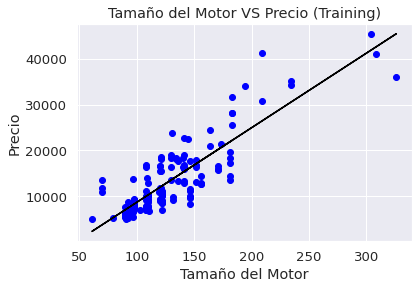

In [56]:
#Realizamos la visualizacion del set de entrenamiento

regressor_train = plt
regressor_train.scatter(X_train, Y_train, color = 'blue')
regressor_train.plot(X_train, regressor.predict(X_train), color = 'black')
regressor_train.title('Tamaño del Motor VS Precio (Training)')
regressor_train.xlabel('Tamaño del Motor')
regressor_train.ylabel('Precio')
regressor_train.show()
regressor_train.close()

Realizamos la visualizacion del set de entrenamiento, donde vemos que las muestras del dataset de training vs la linea de regresion del modelo cuentan con un comportamiento positivo en su pendiente. Ahora pasemos a evaluar con los valores de testing


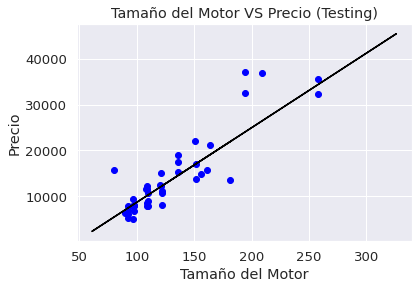

In [57]:
#Realizamos la visualizacion del set de testing

regressor_test = plt
regressor_test.scatter(X_test, Y_test, color = 'blue')
regressor_test.plot(X_train, regressor.predict(X_train), color = 'black')
regressor_test.title('Tamaño del Motor VS Precio (Testing)')
regressor_test.xlabel('Tamaño del Motor')
regressor_test.ylabel('Precio')
regressor_test.show()
regressor_test.close()

En el set de testing donde vemos que las muestras del dataset de testing vs la linea de regresion del modelo cuentan con un comportamiento positivo en su pendiente, muy similar al de training


Ahora, con los metodos intercep y coef de nuestro modelo, Exportamos el intercepto y el coeficiente o la pendiente

In [58]:
# Exportamos de nuestro modelo el intercepto y el coeficiente o la pendiente
print("Intercepto: {}, Coeficiente: {}".format(regressor.intercept_, regressor.coef_))

Intercepto: -7513.950427481541, Coeficiente: [162.32926503]


Nuestra funcion es la siguiente

$$
price = -7513.95 + 162.32 *  engine-size
$$

Observacion: Podemos ver en esta gráfica que "price" esta correlacionada positivamente con "engine-size" debido a que la pendiente de regresión es positiva. Recuerda que en la clase de correlacion vimos que la relacion o el coeficiente de correlacion de pearson era alto (0.7)

Ahora miremos el score o la calificacion de nuestro modelo

In [59]:
regressor.score(X_test, Y_test)

0.7775197477684599

La calificacion de nuestro modelo da un 77.7% lo cual puede que sea un excelente modelo

Ahora ya sabes como aplicar un modelo de regresion simple, teniendo en cuenta los valores de correlacion hallados en la fase exploratoria.

Pero ¿Sera que este modelo es suficiente, o podemos aplicar otros modelos para mejorar posiblemente el score?

En la proxima clase aplicaremos otro tipo de modelo de regresion, el cual nos permitira aplicar mas variables en nuetro modelo. Nos vemos en la siguiente clase




## Clase 16: Aplicando el Modelo de Regresion Lineal Multiple

Hola, te doy la bienvenida a esta clase, en la cual construiremos un modelo de regresion lineal multiple.

Desde mi punto de vista, este modelo es uno de los mas usados ya que nos permite usar mas de una variable independiente para predecir la dependiente, y por la sencillez de su comprension es muy facil de aplicar

<p>¿Que necesitamos para predecir el precio de un coche usando mas de una variable?</p>

<p>Si queremos usar mas variables en el modelo para predecir el precio podemos usar la <b>Regresión Lineal Multiple</b>.
La Regresión Lineal Multiple es parecida a la Simple pero este método es usado para explicar la relación entre una variable de respuesta continua (dependiente) y <b>dos o mas</b> variables predictoras (independiente).
La mayoría de los actuales modelos de regresión involucran multiples predictores. Se ilustrará la estructura utilizando cuatro varaibles predictoras pero estos resultados pueden aplicarse a cualquier entero:</p>


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>Sabemos por la sección anterior que otros buenos predictores del precio pueden ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>    
    <li>Length</li>    
    <li>Width</li>    
</ul>
Desarrollemos un modelo utilizando estas variables como predictoras.

Definimos las variables independientes (las ya mencionadas anteriormente) y objetivo (precio)

In [60]:
# Definimos las variables independientes y objetivo
X = df[['horsepower', 'curb-weight', 'engine-size','length','width']]
Y = df['price'].values

dividimos nuestro dataset en entrenamiento y testing, con una proporcion de 80%/20%

In [61]:
# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Invocamos el modelo y creamos el modelo con .fit

In [62]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
Vamos a dibujar una distribucion 

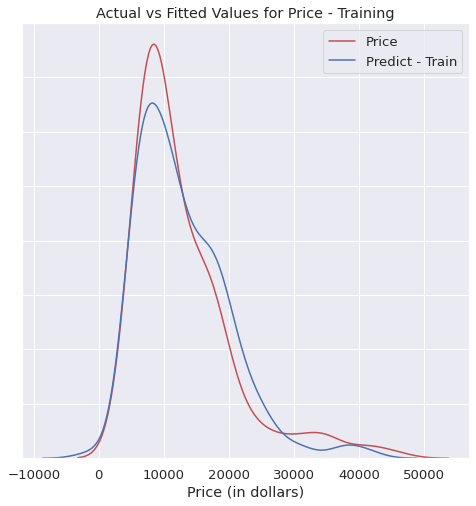

In [63]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_train, hist=False, color="r")
sns.distplot(regressor.predict(X_train), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Train'])

plt.title('Actual vs Fitted Values for Price - Training')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Train'])

plt.show()
plt.close()

Podemos observar que los valores en el set de entrenamiento estan razonablemente cerca a los actuales debido a que las dos distribuciones ser solapan un poco, ahora vamos a validar con el set de testing

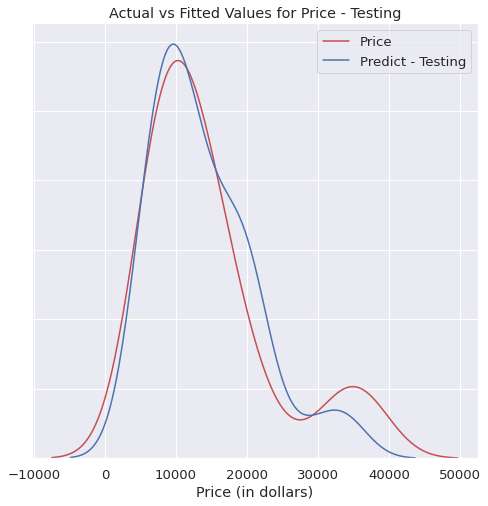

In [64]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_test, hist=False, color="r")
sns.distplot(regressor.predict(X_test), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

Podemos observar que los valores en el set de testing estan razonablemente cerca a los actuales debido a que las dos distribuciones ser solapan un poco, ahora vamos a validar con el set de testing, ahora vamos a validar nuestro score e imprimir el intercepto y los coeficientes

In [65]:
regressor.score(X_test, Y_test)

0.77722326394185

In [66]:
regressor.intercept_

-50408.50830055337

In [67]:
regressor.coef_

array([ 2.56362588e+01,  3.97492628e+00,  7.90153696e+01, -1.93251317e+03,
        4.62191537e+04])

La funcion es: 

$$
Price = -50408.50 + 25.6*horsepower + 3.97*curb-weight + 79.01*engine-size - 193.25*length + 4621.1*width
$$


La calificacion de nuestro modelo da un 77.77% lo cual es similar al primer modelo

Excelente!!, Ahora ya sabes como aplicar un modelo de regresion multiple, adicionando las variables con mejor correlacion

Pero quiero mostrarte que se puede mejorar aun mas este score, te voy a enseñar un ultimo modelo, llamado Bosque Aleatorio. Nos vemos en la proxima clase

## Clase 17: Aplicando el Modelo de Bosques Aleatorios



Hola, te doy la bienvenida a esta clase, en la cual construiremos un modelo de Bosques Aleatorios para Regresion

En Ciencia de Datos es normal realizar comparaciones entre varios algoritmos y modelos, con el fin de evaluar el mejor de todos en cuanto a metricas de medicion, como lo es el score

Para los modelos de Regresion Lineal Simple y Multiple en nuestro de set de datos vimos que el score se encuentra cerca al 77.7%, pero, ¿Por que no aplicar un tercer modelo?

Este tercer modelo se llama Bosque Aleatorio. Random forest (o random forests) también conocido como "Bosques Aleatorios" internamente tiene una combinación de árboles predictores (modelo de arbol de regresion) tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. 

En otras palabras, dependiendo de la cantidad de arboles, cada arbol realiza una prediccion particular de acuerdo a la configuracion aleatoria de los datos. La respuesta de esto se va acumulando a la salida de nuestro bosque.

Puede ser un poco complejo el concepto, pero vamos al codigo para comprender mejor su estructura



Primero realizamos la importacion del algoritmo mediante sklearn

In [68]:
from sklearn.ensemble import RandomForestRegressor

Definimos nuestras variables dependientes e independientes

In [69]:
# Definimos las variables independientes y objetivo
X = df[['horsepower', 'curb-weight', 'engine-size','highway-L/100km','city-L/100km']]
Y = df['price']

Dividimos el set de datos en train y test

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Creamos el modelo de random forest, donde: 
- n_jobs: Cantidad de procesadores trabajando en paralelo 
- oob_score: Metricas del arbol, lo necesitamos para que el modelo sea autonomo en realizar las predicciones
- n_estimators: La cantidad de arboles que necesita el modelo para generar la mejor prediccion. Vamos a usar 10 arboles

Por ser un modelo que iterara 10 arboles, puede que demore un poco en dar nuestros resultados

Luego aplicamos el metodo fit para el dataset de train

In [71]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

Ahora realizamos la validacion del set de entrenamiento

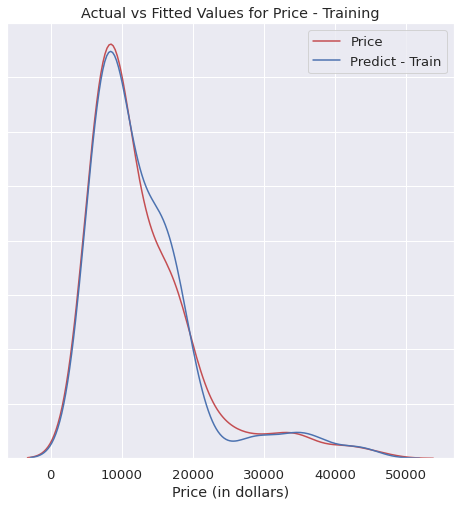

In [72]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_train, hist=False, color="r")
sns.distplot(forest.predict(X_train), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Train'])

plt.title('Actual vs Fitted Values for Price - Training')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Train'])

plt.show()
plt.close()

Vemos que la grafica de precio y de prediccion de precio son casi identicas, vamos a validar ahora con set de testing

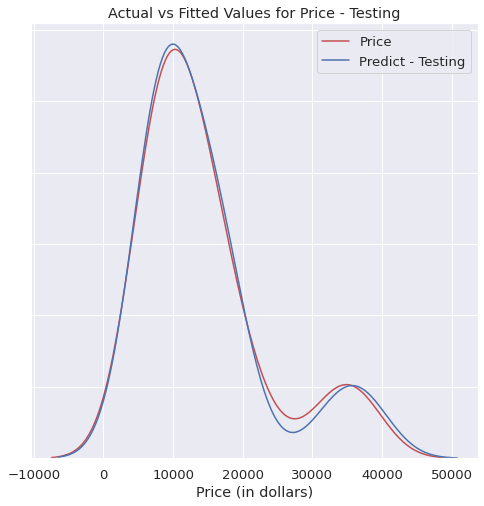

In [73]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_test, hist=False, color="r")
sns.distplot(forest.predict(X_test), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

Las dos graficas son casi iguales para el set de testing, muy similar al resultado de entrenamiento, ahora vamos a validar el score

In [74]:
forest.score(X_test, Y_test)

0.9386446099883604

El score es muchisimo mejor, ya que de los datos nuevos, el modelo los va a predecir mejor en un 90%, en comparacion con los modelos anteriores que estan en el 77% aproximadamente

Genial, encontramos un modelo que mejor se comporta con nuestro set de datos y vimos que las graficas de train y test se comportan muy similar si buscamos su prediccion.

Ahora es tu turno de realizar el proyecto, aplicando los modelos que vimos en este modulo, te espero en la siguiente clase

# Visualización de resultados efectiva.



## Clase 19: Visualizacion Efectiva con Python

Hola, te doy la bienvenida al modulo final de nuestro viaje Introductorio a Data Science con Python. Te felicito por llegar a este punto. Ya conoces algunas herramientas las cuales te pueden ayudar a limpiar, analizar y modelar tus datos

Ahora llego el turno de visualizar nuestros datos y nuestros analisis. Seguro haz escuchado la frase "una imagen vale mas que mi palabras", y para Ciencia de Datos aplica perfecto esta mencion, ya que de nada sirve realizar todo este proceso, sin un buen grafico que te ayude, asi que, vamos a la computadora

Si te haz dado cuenta, en todo nuestro Notebook hemos sacado conclusiones validar de dos formas o hacks validos. 

- La primera ha sido realizando una "impresion" de lo que contiene las variables que hemos creado 
- La segunda, hemos creado graficos interesantes con matplotlib o seaborn

Veamos un ejemplo para recordar, vamos va analizar la variable horsepower

Si recuerdas bien, en el capitulo de "discretizacion" nosotros creamos una especie de contenedores, el cual nos permite agrupar de acuerdo a un intervalo si los caballos de fuerza son bajos, medios y altos

Una vez hecho esto, vamos a realizar la comparacion si mostramos estos resultados por celdas o si usamos alguna herramienta de visualizacion

Aca estan las columnas horsepower y 'horsepower-binned', que fue la que nos resulto haciendo el proceso de discretizacion de datos

In [75]:
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


Ahora, una vez realizado esta etapa, vamos a mostrar las cantidades resultantes de cada grupo

In [76]:
df[['horsepower','horsepower-binned']].groupby("horsepower-binned").count()

,horsepower
horsepower-binned,
Bajo,153
Medio,43
Alto,5


El resultado que arrojo fue una tabla la cual nos muestra la cantidad hallada de acuerdo al grupo, pero ¿Y si vemos esto de forma grafica?

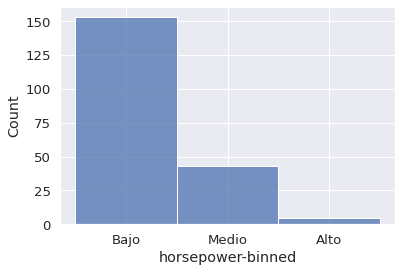

In [77]:
sns.histplot(data=df["horsepower-binned"]) # Creeamos el grafico
plt.show()
plt.close()

Aunque ambos resultados son concluyentes y nos muestran informacion, por experiencia es mucho mejor un grafico, ya que si te das cuenta vemos por intuicion que "Bajo" es el que tiene mayor cantidad, seguido de Medio y por ultimo Alto.

Adicional a esto, si debes crear una presentacion en diapositivas es mas manipulable un grafico que la tabla 

Ahora pasemos a otro ejemplo

En el episodio de Analisis Exploratorio de Datos, cuando aprendimos a usar el metodo describe() encontramos una forma de mostrar los valores estadisticos. Realizamos el experimento de mostrar todo el dataset, o una ciertas columnas 



In [78]:
df[["normalized-losses"]].describe()

,normalized-losses
count,201.00000
mean,122.00000
std,31.99625
min,65.00000
25%,101.00000
50%,122.00000
75%,137.00000
max,256.00000


Tambien te mostre que hay otra forma de visualizar estas metricas estadisticas gracias al grafico de boxplot o de caja y bigotes

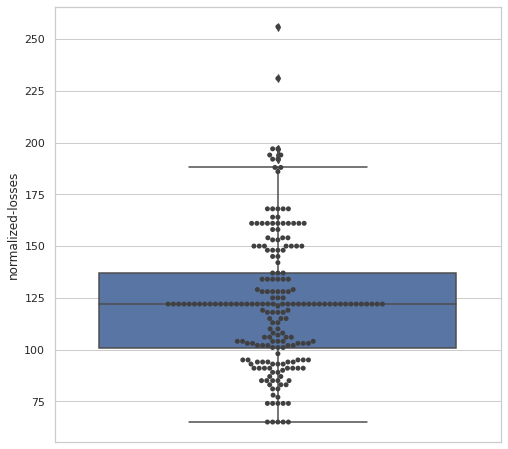

In [79]:
plt.figure(figsize=[8,8])
sns.set(style="whitegrid")
ax = sns.boxplot(y="normalized-losses", data=df, showfliers = True)
ax = sns.swarmplot(y="normalized-losses", data=df, color=".25")
plt.show()
plt.close()

Desde mi punto de vista este grafico es muy util, pero no es para todas las audiencias. Una persona que entienda este grafico debe saber donde se encuentra ubicado los maximos, minimos, promedios y valores atipicos. Pero no solo basta con ubicarlos, tambien se debe entender el concepto matematico que hay detras de ello.

Este tipo de grafico esta mas orientado a un equipo de Ciencia de Datos y no para tu cliente final. En la mayoria de casos tu cliente final no tiene conceptos matematicos o estadisticos, por lo que te recomiendo en estos casos es usar palabras: Si vas a desarrollar una solucion, al momento de dar conclusiones usa terminos, procesos o palabras no tan tecnicas, sino el lo posible mas familiares

 - En vez de decirle a tu cliente: *La mediana de los datos de la columna "normalized-losses" esta en el valor 122*
 - Es mejor decirle: *La mitad de los valores es menor que o igual a 122 y la otra mitad de los valores es mayor que o igual a 122. El valor 122 es nuestro punto medio de todos los datos de "normalized-losses"*

Ahora, a la hora de mostrar los resultados de algun modelo de pronostico siempre es bueno mostrar los datos de una forma forma grafica posible

Este es nuestro dataset de testing

In [80]:
X_test.head()

,horsepower,curb-weight,engine-size,highway-L/100km,city-L/100km
18,70,1874,90,5.465116,6.184211
170,73,2480,110,7.121212,7.833333
107,95,3430,152,9.400000,9.400000
98,152,3095,181,10.681818,13.823529
177,156,3151,161,9.791667,12.368421


Las dimensiones de este dataset son las siguientes (40 filas, 5 columnas)

In [81]:
X_test.shape

(41, 5)

Ahora, al momento de predecir la variable "price", nos da el siguiente resultado

In [82]:
forest.predict(X_test)

array([ 6219.7       ,  9485.1       , 16788.4       , 16403.2       ,
       15676.6       ,  8226.1       , 13334.19166667,  6806.2       ,
       18655.8       ,  7549.3       ,  9725.43333333, 33116.        ,
        7822.6       ,  7924.        , 13654.6       , 17619.3       ,
        7106.        , 14220.16666667,  8301.1       ,  6787.8       ,
        9461.2       , 13943.15      , 36912.3       ,  8141.2       ,
        9856.4       , 33116.        ,  8140.1       ,  8792.3       ,
       15607.5       , 36912.3       , 38057.3       , 11737.69166667,
        7014.3       , 16788.4       ,  7839.8       , 10720.46666667,
       14220.16666667, 18763.        ,  9717.03333333, 17240.        ,
        7809.15      ])

La longitud de esta prediccion nos da 41, que es el valor de las filas

In [83]:
len(forest.predict(X_test))

41

Con esta informacion podemos adjuntar los resultados, adicionando las columnas de price real, y las predicciones de price

In [84]:
df_price = X_test.copy().reset_index(drop=True)
df_price["price"] = Y_test.values
df_price["price_predicted"] = forest.predict(X_test)
df_price

,horsepower,curb-weight,engine-size,highway-L/100km,city-L/100km,price,price_predicted
0,70,1874,90,5.465116,6.184211,6295.0,6219.700000
1,73,2480,110,7.121212,7.833333,10698.0,9485.100000
2,95,3430,152,9.400000,9.400000,13860.0,16788.400000
3,152,3095,181,10.681818,13.823529,13499.0,16403.200000
4,156,3151,161,9.791667,12.368421,15750.0,15676.600000
5,85,2275,109,6.911765,8.703704,8495.0,8226.100000
6,110,2507,136,9.400000,12.368421,15250.0,13334.191667
7,62,1985,92,6.025641,6.714286,5348.0,6806.200000
8,121,2765,164,8.392857,11.190476,21105.0,18655.800000
9,70,2081,98,6.351351,7.833333,6938.0,7549.300000


Si te das cuenta, los valores en algunos registros son muy similares, e incluso con solo mostrar nuestro score del 89% bastaria

Esto seria lo habitual: Mostrar los resultados de nuestro modelo y el score, pero mi recomendacion es mostrar la comparacion de las distribuciones de price y price_predicted en un grafico

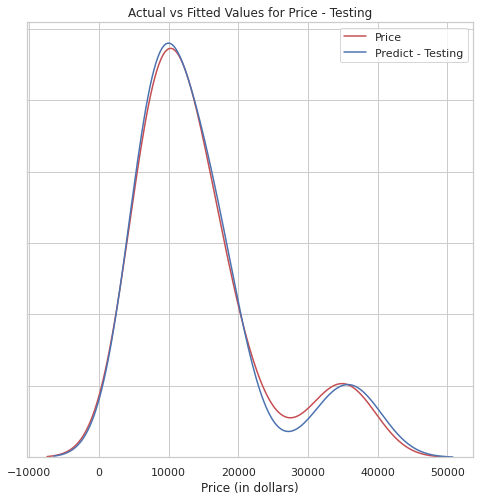

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

Como viste, es mucho mas sencillo la comprension del resultado de nuestro modelo en un grafico, que mostrandolo en un tabla o dataframe

Estas son algunos hacks para una correcta visualizacion. En algunos escenarios es muy util mostrar graficos y en otros es mas util mostrar conclusiones o tabla de resultados. Por lo general se usa Python para mostrar estos graficos cuando estamos en la parte de exploracion o modelado. Algunas empresas optan incluso por mostrar esta informacion en herramientas puras de DataViz como Tableau, PowerBI por ejemplo, pero es muy importante el uso de herramientas de programacion como Python o R para explorar nuestros datos y modelarlos

Estas son algunos hacks que te recomiendo que apliques, ya que este tema de DataViz requiere una profundizacion mayor, y para ello en la seccion de adjuntos te dejo algunos blogs y paginas en las cuales puedes profundizar mas sobre la correcta visualizacion de datos, no solo en Python, sino usando otras herramientas para la construccion de graficos

https://www.crehana.com/clases/v2/11850/player/46202/?source_page=Course%20Dashboard&source_detail=Header%20Image

https://relopezbriega.github.io/blog/2016/09/18/visualizaciones-de-datos-con-python/

https://matplotlib.org/

https://seaborn.pydata.org/

En la proxima clase te mencionare una frase que me ha ayudado mucho, y que seguro te va a ayudar: "Un Data Scientist vale lo que sus informes". Te espero alli

## Clase 20: Un Data Scientist vale lo que sus informes

- #4B22F4
- #0BD4C1
- #F0F0F0
- #181B32
- #9C86F9
- #D2FAF6

Hola, te doy la bienvenida a esta clase en la cual aprenderas a darle muchas mas peso a tus resultados, asi que acompañame

Hasta ahora nos hemos dedicado puramente a analizar datos: Hemos aprendido a leerlos y extraerlos, hemos aplicado tecnicas de limpieza, hemos hecho descripcion de nuestros datos y tambien hemos construido modelos de prediccion; Y si eres un apasionado como yo en los lenguajes de programacion de seguro hemos disfrutado muchisimo el usar la programacion para obtener resultados en cada etapa que hemos recorrido

Pero a la hora de mostrar resultados, es importante presentarlos de una forma mas profesional y que dependiendo de tus analisis, brinden a la empresa algun tipo de valor para generar estrategias que beneficien al negocio

Al CEO de tu empresa, o al equipo de marketing o a tu cliente no le interesa las tecnicas que hayas hecho, o el lenguaje que hayas aplicado, o la forma de como haya tratado tus datos. A ellos les importa los resultados que encontraste, y la forma en como lo presentes es importante.

Python como vimos en el curso, cuenta con unas herramientas valiosas que nos ayudan a visualizar nuestros datos, y a mostrarlos de forma profesional. Pero tambien como mencione en la clase anterior, tambien existen herramientas puras de DataViz, como Tableau, PowerBI, o Shiny que es usado en el lenguaje R, entre otras

Ahora, usando los graficos que vimos en el curso, vamos a mostrar los Do an Dont's para mostrar visualizaciones cuando quieres mostrar resultados, asi que acompañame a la tablet


Como primer grafico, vamos a representar la distribucion de las ventas de los coches

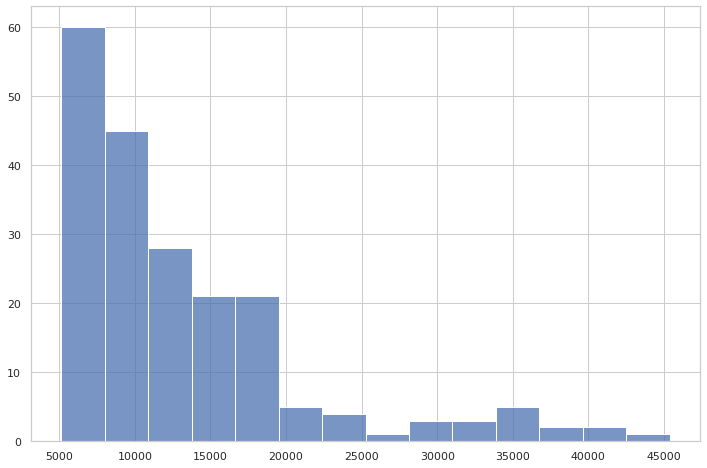

In [86]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.histplot(data=df["price"])
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.show()
plt.close()

Este grafico muestra la cantidad de coches vendidos de acuerdo a su precio. A este grafico se le puede realizar mejoras en cuanto a su visualizacion

Al momento de generar un grafico, algunas empresas solicitan que sus resultados o visualizaciones se hagan con algunas reglas de diseño. Esas reglas de diseño, en otras palabras, les permite mostrar una identidad de marca. En este caso, vamos a suponer que nuestro cliente requiere que sus graficos o resultados se muestren en una paleta de colores predeterminada

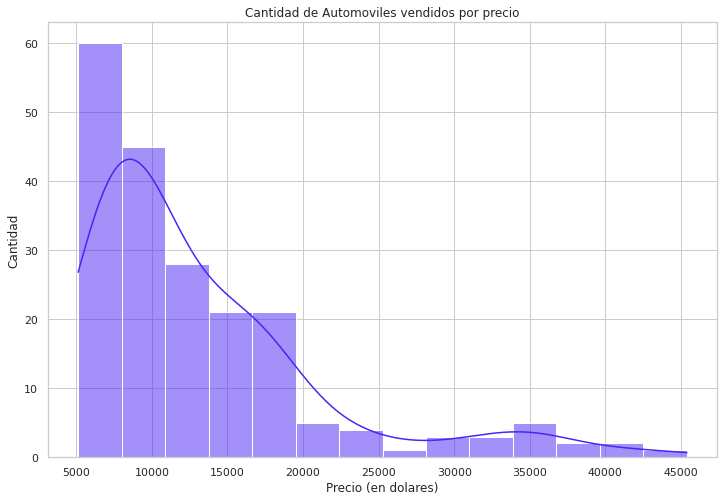

In [87]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 8x8
sns.histplot(df["price"], color='#4B22F4', kde = True) # Tomamos la variable precio, con el color azul de nuestra paleta de colores
plt.xlabel("Precio (en dolares)") # Los ejes siempre es recomendable colocarles titulos
plt.ylabel("Cantidad")
plt.title("Cantidad de Automoviles vendidos por precio") # Un titulo del grafico siempre es importante
plt.show()
plt.close()

En comparacion con el primer grafico, este ya cuenta con un color ya definido por nosotros, adicionamos nombre a los ejes y un titulo lo cual da a nuestra visualizacion una intuicion sobre lo que queremos representar: ¿Cual es la cantidad de ventas que tenemos segun el precio?

La linea de distribucion es opcional, pero tambien da una intuicion sobre como se distribuyen el precio

Ahora, vamos a revisar la distribucion de caballos de fuerza

Si recuerdas, este grafico ya lo vimos en este curso, y para manejar esta variable aplicamos una tecnica que se llama "discretizacion de los datos". 



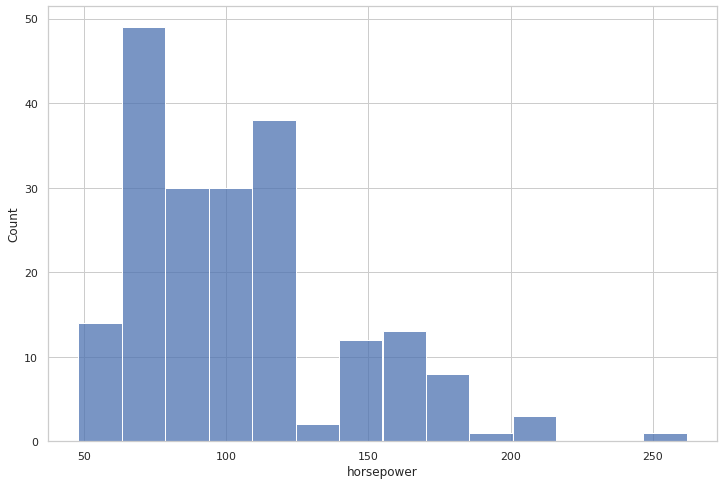

In [88]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.histplot(data=df["horsepower"])
sns.set(font_scale=1)
plt.show()
plt.close()

Esta discretizacion es muy util ya que como nos dimos cuenta en este grafico se muestran todas las cantidades de caballos que estan en nuestro set de datos. Al momento de crear nuestros contenedores, agrupamos estas cantidades en 3 diferentes grupos

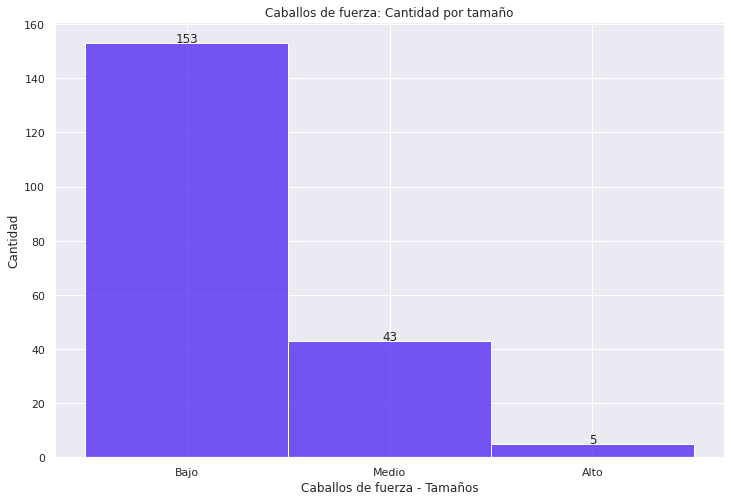

In [89]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
colors = ['#4B22F4','#9C86F9','#0BD4C1']
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=df["horsepower-binned"])

#https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = "center") # sets horizontal alignment (ha) to center

plt.xlabel("Caballos de fuerza - Tamaños")
plt.ylabel("Cantidad")
plt.title("Caballos de fuerza: Cantidad por tamaño")

plt.show()
plt.close()

Si te diste cuenta, mejoramos mucho mas el grafico: Adaptamos los colores que requerimos, colocamos titulos en los ejes y en el grafico mas intuitivos y como valor adicional adicionamos los valores que representan cada barra

Ahora, Recordemos lo que vimos en el capitulo de correlacion: Ese episodio vimos, en resumen, que para que exista una fuerte relacion debe tener un valor cercano a 1, si es debil es -1 y si no existe debe estar cerca a 0. Para ello usamos dos formas de visualizar: Una en forma de dataset y otra de forma grafica

En cuanto a la forma grafica, esta la forma por defecto como la muestra Python, definiendo un tamaño para los ejes y una escala de color predefinida. Si te fijas, en el eje vertical no se muestran todas las variables. De esta forma no es posible identificar cuales son, al detalle, las que mas se correlacionan

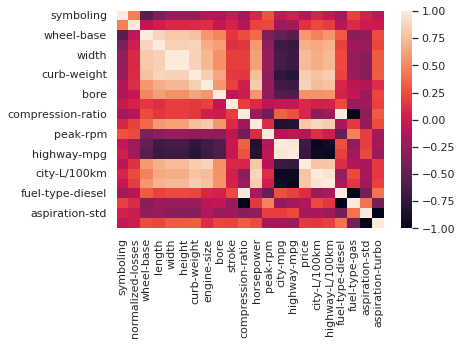

In [90]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
sns.heatmap(correlations, annot=False)
plt.show()
plt.close()

Ahora mejoremos el grafico

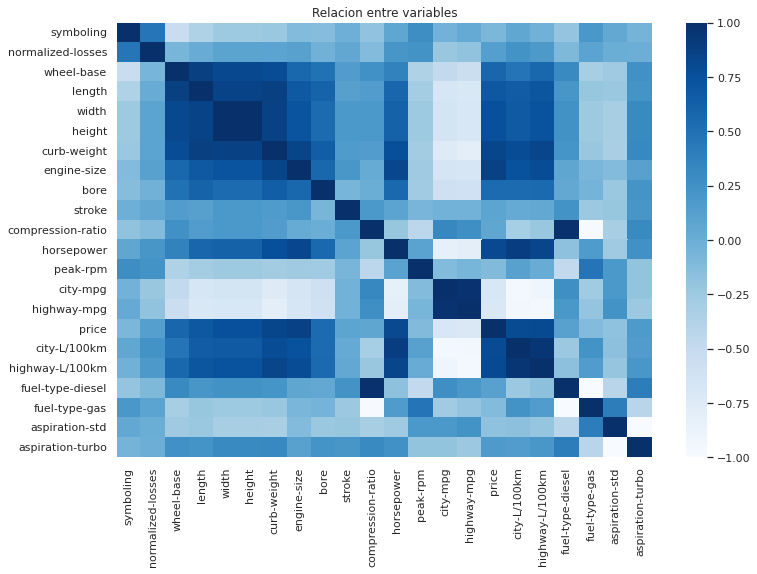

In [91]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
#colors = ["#F0F0F0", "#0BD4C1", "#9C86F9", "#4B22F4","#181B32"]
sns.heatmap(correlations, annot=False, cmap="Blues")

plt.title("Relacion entre variables")

plt.show()
plt.close()

#https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

Con este grafico, vemos que ya se ven todas las variables en los ejes, modificamos la paleta de colores para que entre mas oscuro, mas correlacion hay y tambien adicionamos un titulo a nuestro grafico

Pasemos a ahora a una visualizacion de caja y bigotes. Este grafico como te mencione es muy util si tu audiencia sabe un poco de metricas estadisticas (media, maximo, minimos, cuartiles). 

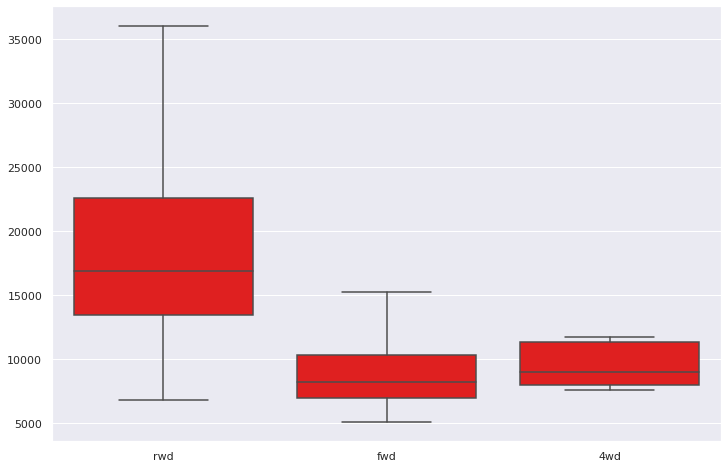

In [92]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")

ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False, color='red')

ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()
plt.close()

Para el escenario en que lo requieras usar debes tener en cuenta las mismas recomendaciones que hemos mencionado en esta clase: Titulos en ejes y en graficos, colores que identifiquen ciertos grupos y tambien como punto opcional puedes colocar informacion adicional, como que no esta de mas dibujar la dispersion de puntos en este diagrama

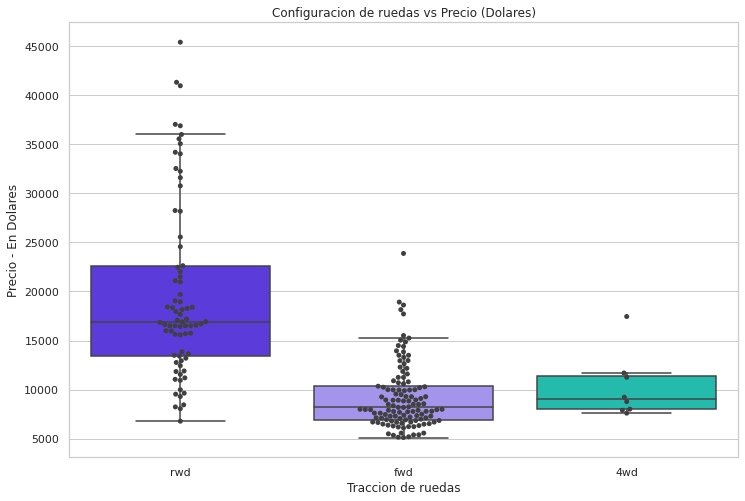

In [93]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")

plt.xlabel("Traccion de ruedas")
plt.ylabel("Precio - En Dolares")
plt.title("Configuracion de ruedas vs Precio (Dolares)")
sns.set(font_scale=1)
plt.show()
plt.close()

Finalmente, validando nuevamente el grafico de respuesta de nuestro mejor modelo, vamos a visualizar la respuesta de nuestro dataframe de testing, comparando las distribuciones de precio vs precio_predicted

En este grafico se ve que se visualiza las dos graficas de las columnas mencionadas, pero vemos que hay mas informacion de la que necesitamos. Para ello debemos ajustar este grafico

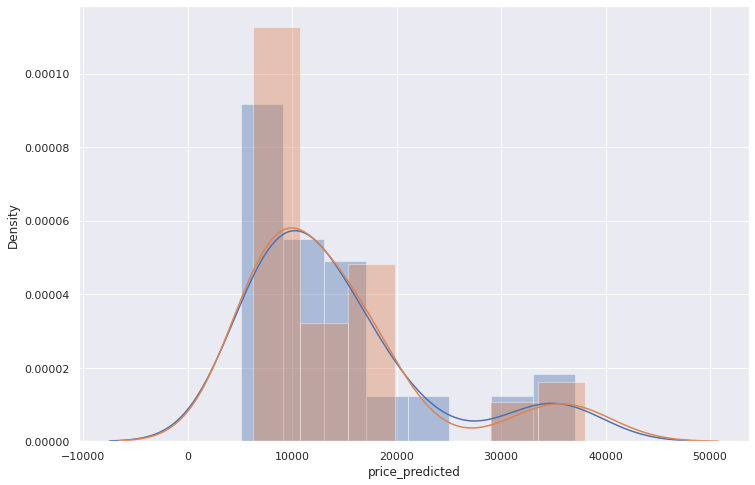

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"]) # Price
sns.distplot(df_price["price_predicted"]) #Price Predicted

plt.show()
plt.close()

Con estos ajustes vemos que nuestra grafica tiene mejores resultados. Para esta ocasion adicionamos una leyenda: Cuando se manejan graficos combinados de esta forma es muy util adjuntar una leyenda en la cual se muestre a que corresponde cada linea

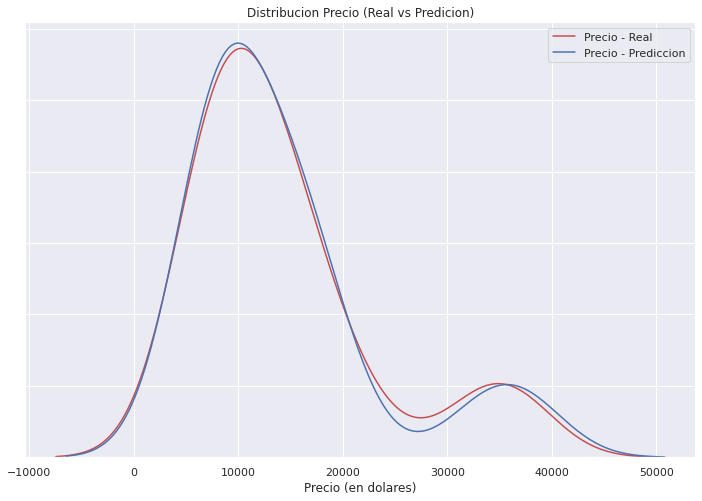

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Distribucion Precio (Real vs Predicion)')
plt.xlabel('Precio (en dolares)')

plt.legend(labels=['Precio - Real', 'Precio - Prediccion'])
plt.show()
plt.close() 
 

Como vimos en estos Do and Dont's, es muy importante "embellecer" nuestros graficos. Realizar este proceso permite a tu audiencia y te permite a ti tener mucho mas claro tus resultados, y da un toque de profesionalismo a tu trabajo. 

Estas recomendaciones me han ayudado mucho en mi trabajo, ya que el mejorar cada dia en estas tecnicas me han permitido en mi experiencia dar resultados y ayudar a las empresas a dar conclusiones y estrategias valiosas

Espero que estos consejos te sirvan en tus investigaciones, y recuerda que en este tema de DataViz se encuentra mucha documentacion e informacion, asi que te invito a consultarla y profundizar sobre ella

Nos vemos en la proxima clase, ya que como punto final y teniendo en cuenta estas tecnicas de DataViz, debemos documentar y explicar lo que hayamos encontrado en nuestro analisis, asi que te espero alli

## Clase 21: Las mejores visualizaciones y conclusiones de nuestros resultados



Hola, te doy la bienvenida a esta clase. Ya estamos por finalizar este viaje y ahora debemos concluir y documentar nuestros resultados

Ya estamos en la etapa final de nuestro analisis, como viste hemos pasado por varias etapas, desde la ingesta y manipulacion, pasando por la exploracion hasta el modelo de nuestro datos, haciendo el testing a tres modelos basicos aplicados en Machine Learning.

En la clase anterior tambien vimos que hacer y que no hacer a la hora de visualizar nuestros hallazgos, asi que con todo esto, estamos listos para mostrar lo que encontramos, asi que vamos a la computadora

En primera instancia, y como sabes nuestra variable objetivo fue el precio asignado a cada automovil, asi que algunas preguntas a responder pueden ser...

1. **¿Como ha sido la distribucion del precio de los automoviles?**

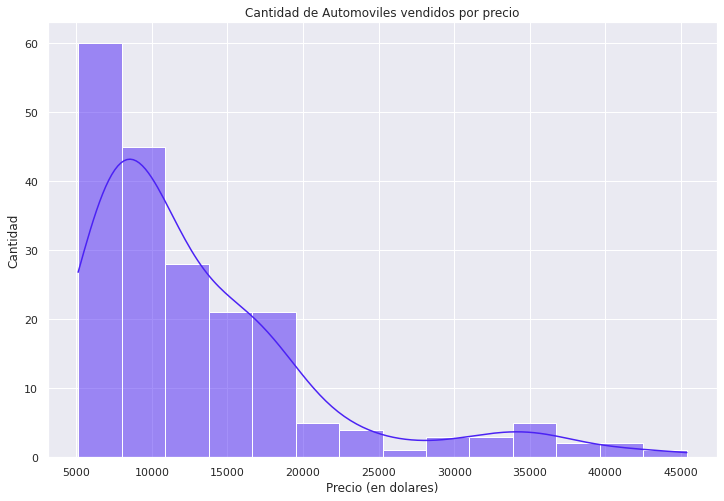

In [96]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 8x8
sns.histplot(df["price"], color='#4B22F4', kde = True) # Tomamos la variable precio, con el color azul de nuestra paleta de colores
plt.xlabel("Precio (en dolares)") # Los ejes siempre es recomendable colocarles titulos
plt.ylabel("Cantidad")
plt.title("Cantidad de Automoviles vendidos por precio") # Un titulo del grafico siempre es importante
plt.show()
plt.close()

El precio de venta de los automoviles se encuentra en un rango entre 5000 y 20000 dolares, donde claramente se ve que entre mas economico es un carro, mayor son la cantidad de ventas de este

2. **¿Existe una relacion de ventas entre el precio y la traccion?**

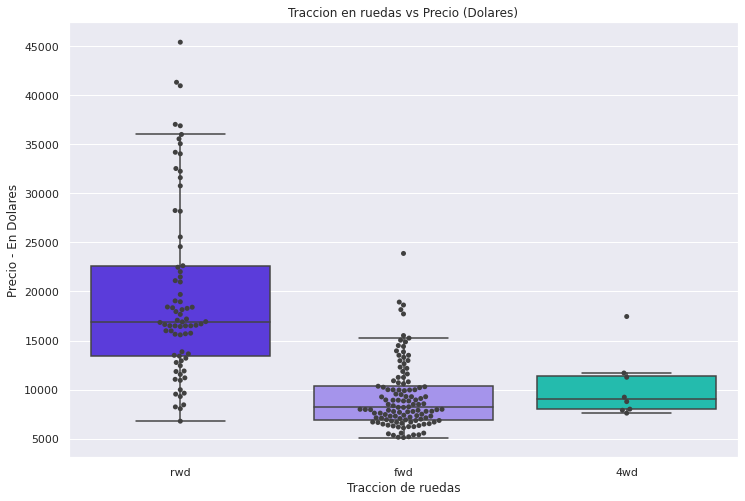

In [97]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")

plt.xlabel("Traccion de ruedas")
plt.ylabel("Precio - En Dolares")
plt.title("Traccion en ruedas vs Precio (Dolares)")
sns.set(font_scale=1)
plt.show()
plt.close()

In [98]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [99]:
df[df["drive-wheels"]=="4wd"]["price"].describe()

count        8.000000
mean     10241.000000
std       3288.211064
min       7603.000000
25%       7984.250000
50%       9005.500000
75%      11367.750000
max      17450.000000
Name: price, dtype: float64

- Traccion frontal (fwd) tiene mayor cantidad de ventas (118), donde el valor medio se encuentra en 8000 dolares (aproximadamente). La muestra de datos para este grupo tiene dispersion minima
- Traccion trasera (rwd) cuenta con 75 ventas, donde el valor medio se encuentra en 17000 dolares (aproximadamente). La muestra de datos para este grupo tiene dispersion mayor
- Traccion en sus cuatro ruedas (4wd) cuenta con 8 ventas, donde el valor medio se encuentra en 9000

3. **En Caballos de fuerza, ¿Como es su comportamiento en cantidad de automoviles vendidos?**

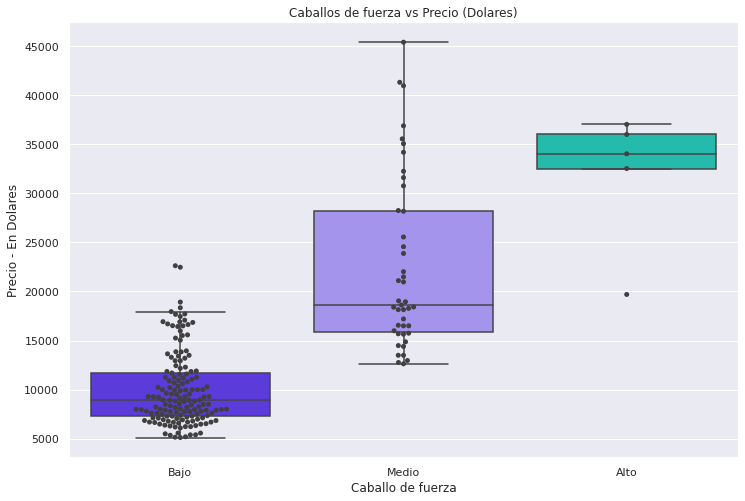

In [100]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))

ax1 = sns.boxplot(x="horsepower-binned", y="price", data=df, showfliers = False)
ax1 = sns.swarmplot(x="horsepower-binned", y="price", data=df, color=".25")
plt.xlabel("Caballo de fuerza")
plt.ylabel("Precio - En Dolares")
plt.title("Caballos de fuerza vs Precio (Dolares)")

sns.set(font_scale=1)
plt.show()
plt.close()

In [101]:
df["horsepower-binned"].value_counts()

Bajo     153
Medio     43
Alto       5
Name: horsepower-binned, dtype: int64

In [102]:
df[df["horsepower-binned"]=="Bajo"]["price"].describe()

count      153.000000
mean      9989.751634
std       3723.679659
min       5118.000000
25%       7295.000000
50%       8921.000000
75%      11694.000000
max      22625.000000
Name: price, dtype: float64

- Mayor cantidad de ventas para el grupo Bajo (153 ventas), donde el punto medio del precio esta en 8900 dolares (aproximadamente)
- Caballos de fuerza Medio tiene 43 ventas, donde el punto medio esta en 18600 dolares (aproximadamente). La muestra para este grupo es dispera
- Menor ventas para el grupo Alto (5 ventas), en comparacion con los demas grupos

4. **En Ubicacion del Motor, ¿Como es su comportamiento en cantidad de automoviles vendidos?**

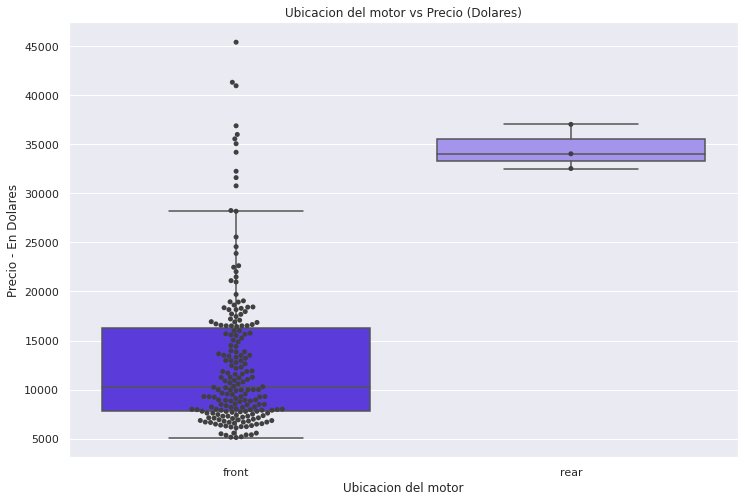

In [103]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(x="engine-location", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="engine-location", y="price", data=df, color=".25")
plt.xlabel("Ubicacion del motor")
plt.ylabel("Precio - En Dolares")
plt.title("Ubicacion del motor vs Precio (Dolares)")
plt.show()
plt.close()

In [104]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [105]:
df[df["engine-location"]=="front"]["price"].describe()

count      198.000000
mean     12884.085859
std       7552.278510
min       5118.000000
25%       7775.000000
50%      10221.500000
75%      16322.000000
max      45400.000000
Name: price, dtype: float64

- La ubicacion frontal habitual es la que mayor se vende, independiente de su precio. Esta localizacion en el dataset conto con 198 ventas y un punto medio de 10 mil dolares (aproximado)

5. **¿Que caracteristicas tienen mayor impacto en las ventas de automoviles?**

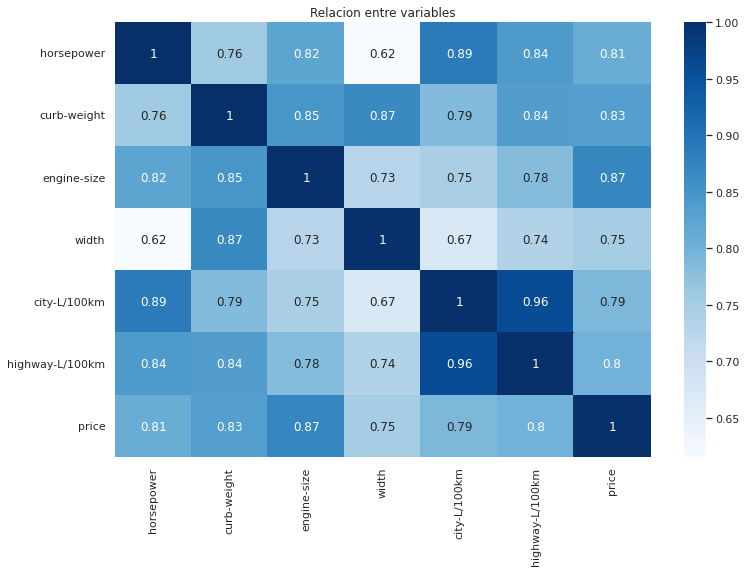

In [106]:
correlations = df[['horsepower', 'curb-weight', 'engine-size','width','city-L/100km','highway-L/100km','price']].corr()
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
#colors = ["#F0F0F0", "#0BD4C1", "#9C86F9", "#4B22F4","#181B32"]
sns.heatmap(correlations, annot=True, cmap="Blues")
plt.title("Relacion entre variables")
plt.show()
plt.close()

- Se encontraron 6 caracteristicas en nuestro set de datos que cuentan una relacion positiva en el precio del automovil

 - caballos de fuerza
 - peso en el vacio
 - tamaño del motor
 - peso
 - rendimiento en ciudad (L/100 km)
 - rendimiento en autopista (L/100 km)


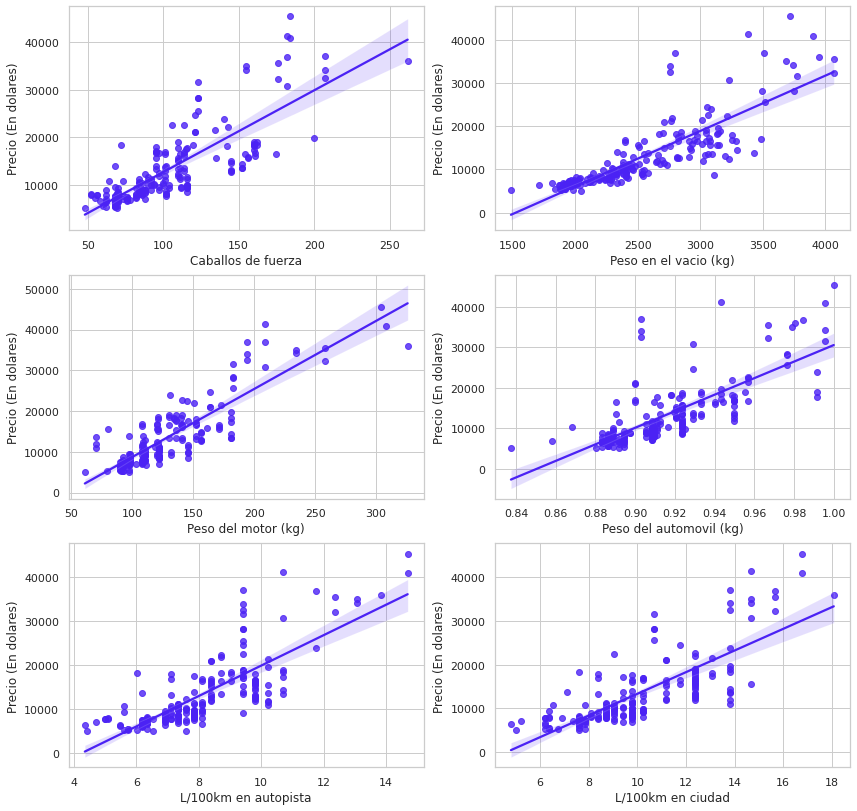

In [107]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

sns.regplot(ax = axes[0, 0], x="horsepower", y="price", data=df)
axes[0,0].set_xlabel("Caballos de fuerza")
axes[0,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[0, 1], x="curb-weight", y="price", data=df)
axes[0,1].set_xlabel("Peso en el vacio (kg)")
axes[0,1].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[1, 0], x="engine-size", y="price", data=df)
axes[1,0].set_xlabel("Peso del motor (kg)")
axes[1,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[1, 1], x="width", y="price", data=df)
axes[1,1].set_xlabel("Peso del automovil (kg)")
axes[1,1].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[2, 0], x="highway-L/100km", y="price", data=df)
axes[2,0].set_xlabel("L/100km en autopista")
axes[2,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[2, 1], x="city-L/100km", y="price", data=df)
axes[2,1].set_xlabel("L/100km en ciudad")
axes[2,1].set_ylabel("Precio (En dolares)")

plt.show()
plt.close()

- Para las variables mencionadas se ve que a mayor incremento en sus valores, el precio sube proporcionalmente
- La distribucion de los datos tienden a tener el mismo comportamiento de la recta, y el margen de error (linea sombreada) no es tan significativa


6. **¿Que accionable se puede crear con estas variables?**

- Se realizo la construccion de 2 modelos predictivos para predecir el precio en funcion de estas variables

- El resultado fue el siguiente:
    - Modelo Regresion Multiple: Score del 77%
    - Modelo Bosques Aleatorios: Score del 90%

- Con base en estos resultados, se procede a usar el metodo de Bosques Aleatorios como algoritmo de prediccion, arrojando el siguiente resultado:

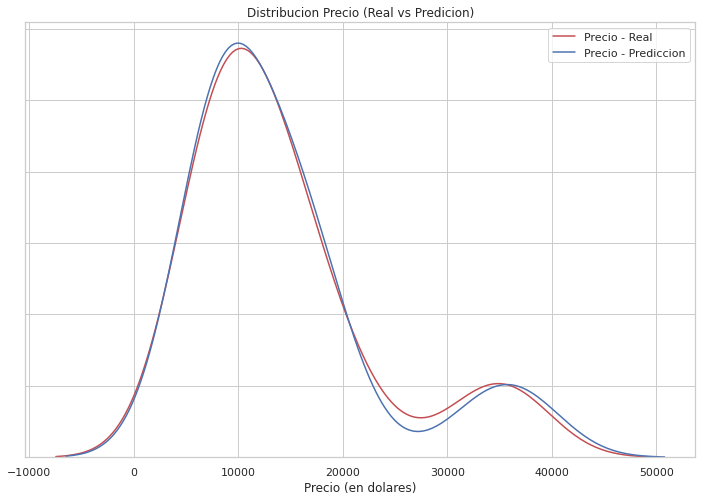

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Distribucion Precio (Real vs Predicion)')
plt.xlabel('Precio (en dolares)')

plt.legend(labels=['Precio - Real', 'Precio - Prediccion'])
plt.show()
plt.close() 

- Con las variables "caballos de fuerza", "peso en vacio", "peso del motor", "rendimiento en autopista" y "rendimiento en ciudad" se ve que la prediccion tiene un comportamiento casi similar al comportamiento real.

- El score alcanzado del 90% quiere decir que de para todo valor nuevo ingresado en el set de datos, este modelo lo predecira bien en un 90%

Y Listo, ya hemos realizado la documentacion de algunos resultados que vimos en nuestra exploracion y modelado del set de datos. Ten en cuenta que todo analista de datos tiene una interpretacion diferente de la informacion, incluso tu puedes haber encontrado otras conclusiones incluso mas interesantes. Lo importante es que comprendas que un proceso no vale si no muestras los hallazgos y los sustentes de forma correcta

Ahora estas listo para documentar tus resultados en el proyecto final, asi que te espero en la siguiente clase